# Laboratorio 1: Conceptos básicos de aprendizaje automático

En este laboratorio les tocará probar con distintos parámetros de los algoritmos de aprendizaje automático aprendidos hasta ahora. La idea es que vean como la selección de atributos, el cambio de hiperparámetros, y los distintos algoritmos afectan los resultados de un regresor o clasificador sobre un conjunto de datos.

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn


from matplotlib.colors import ListedColormap
from sklearn.datasets import load_boston, load_breast_cancer, load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures

from ml.visualization import plot_confusion_matrix, classifier_boundary

np.random.seed(1234)  # Setup seed to be more deterministic

%matplotlib inline

## Regresión

### Carga de datos

In [65]:
boston_data = load_boston()

# Utilizamos aproximadamente 80% de los datos para entrenamiento y 20% para validación
shuff_data = np.random.permutation(506)
shuff_train = shuff_data[:400]
shuff_val = shuff_data[400:]

X_train = boston_data['data'][shuff_train]
X_val = boston_data['data'][shuff_val]

y_train = boston_data['target'][shuff_train]
y_val = boston_data['target'][shuff_val]

# Necesario para poder hacer un regresor por feature
feature_map = {feature: idx for idx, feature in enumerate(boston_data['feature_names'])}

print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Regresión sin regularización

Para revisar cómo afecta el cambio de parámetros y los distintos tipos de regresores y atributos (características) al resultado final del algoritmo de aprendizaje automático, lo que se va a hacer es entrenar el regresor tomando sólo un atributo y visualizar eso.

Se busca entrenar utilizando el conjunto de entrenamiento (el terminado en `train`) y evaluar utilizando el conjunto de validación (el terminado en `val`). Luego se visualiza la función calculada para cada conjunto y se la compara.

Los atributos posibles están listados en la descripción del conjunto de datos en la celda anterior. No todos son útiles para visualizar, en particular solo nos interesan los atributos numéricos y descartamos los atributos que se listan a continuación:

- `CHAS`: Atributo categórico (toma valor 0 o 1).
- `RAD`: Atributo categórico (índice).
- `MEDV`: Este valor se lo lista como atributo en la descripción del conjunto de datos pero en realidad es el valor de `y`, i.e. es el valor que tratamos de aproximar con el algoritmo de aprendizaje automático.

In [66]:
# Seleccionamos un atributo de los listados en la descripción que no sea categórico
selected_feature = 'DIS'  # TODO: modificar esto por algún otro valor para ver como cambian los resultados
feature_col = feature_map[selected_feature]
X_train_feature = X_train[:, feature_col].reshape(-1, 1)  # Hay que ser que sea una matriz no un vector para que funcione con scikit learn
X_val_feature = X_val[:, feature_col].reshape(-1, 1)

### Regresión lineal

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [67]:
# Entrenamos un clasificador utilizando sólo ese atributo sobre el conjunto de entrenamiento (X_train, y_train)
model = LinearRegression()
model.fit(X_train_feature, y_train)

# Evaluamos el desempeño del clasificador utilizando la media del error cuadrado (MSE o mean squared error)
# sobre el conjunto de datos de entrenamiento (X_train, y_train) y lo comparamos con el de validación (X_val, y_val)
# Mientras más cercano a cero mejor
print('Media del error cuadrado para entrenamiento: %.2f' % 
      mean_squared_error(y_train, model.predict(X_train_feature)))
print('Media del error cuadrado para validación: %.2f' %
      mean_squared_error(y_val, model.predict(X_val_feature)))

Media del error cuadrado para entrenamiento: 78.66
Media del error cuadrado para validación: 81.00


##### Visualización de la regresión lineal

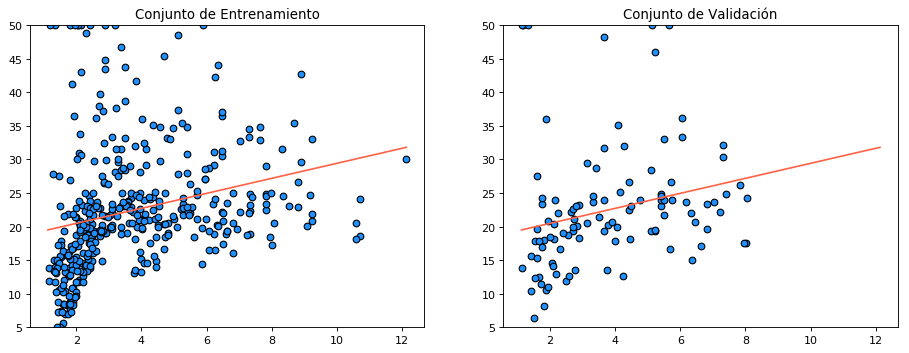

In [9]:
plt.figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')

X_range_start = np.min(np.r_[X_train_feature, X_val_feature])
X_range_stop = np.max(np.r_[X_train_feature, X_val_feature])
y_range_start = np.min(np.r_[y_train, y_val])
y_range_stop = np.max(np.r_[y_train, y_val])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train_feature, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_val_feature, y_val, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación")

plt.show()

### Regresión polinomial

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

Grado del polinomio:  1
Media del error cuadrado para entrenamiento: 79.94
Media del error cuadrado para validación: 77.05 



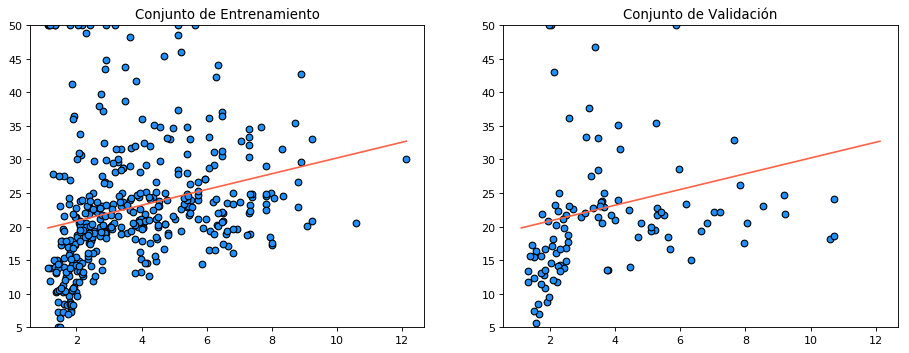

Grado del polinomio:  2
Media del error cuadrado para entrenamiento: 78.23
Media del error cuadrado para validación: 70.20 



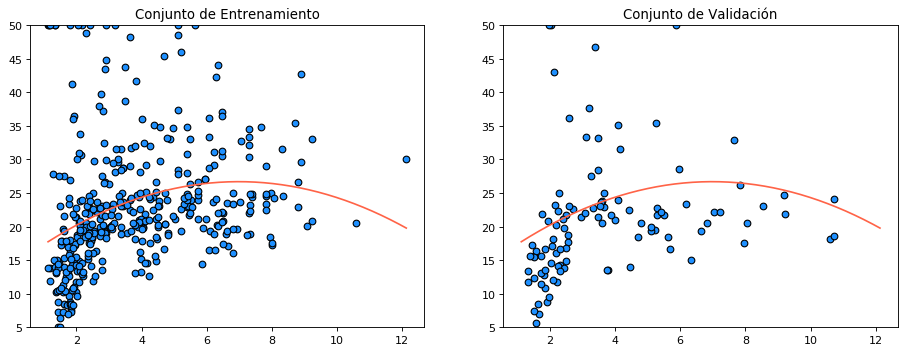

Grado del polinomio:  3
Media del error cuadrado para entrenamiento: 77.61
Media del error cuadrado para validación: 69.07 



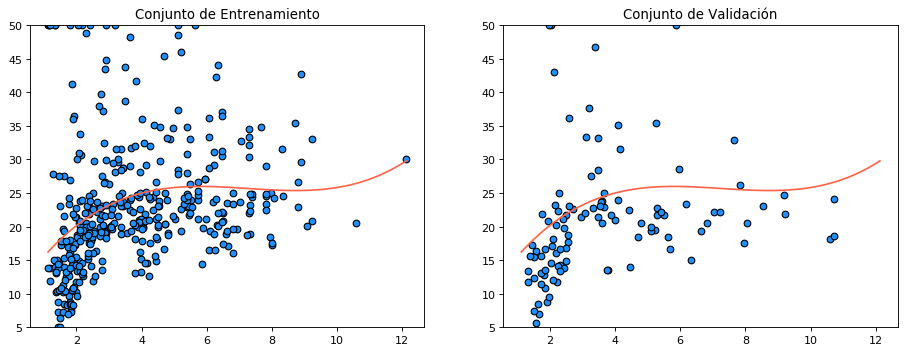

Grado del polinomio:  4
Media del error cuadrado para entrenamiento: 77.59
Media del error cuadrado para validación: 69.17 



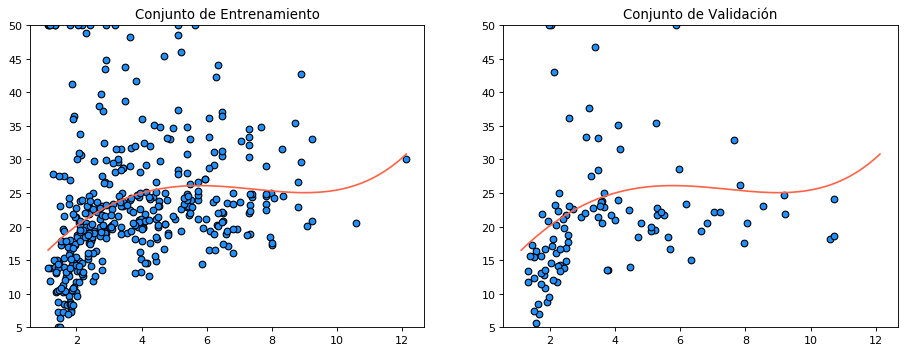

Grado del polinomio:  5
Media del error cuadrado para entrenamiento: 77.13
Media del error cuadrado para validación: 72.61 



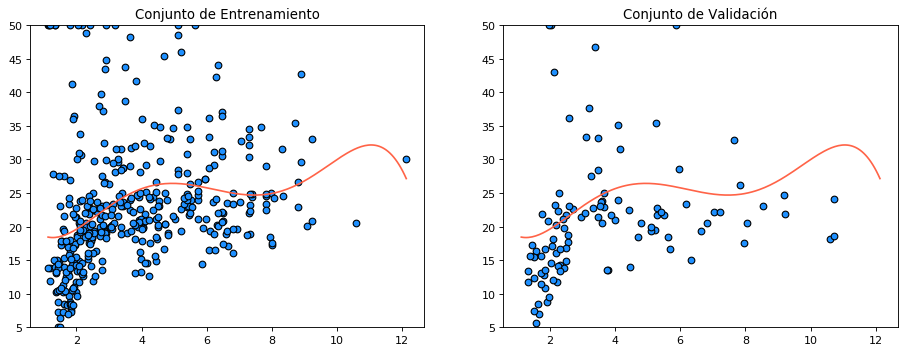

Grado del polinomio:  6
Media del error cuadrado para entrenamiento: 75.99
Media del error cuadrado para validación: 68.61 



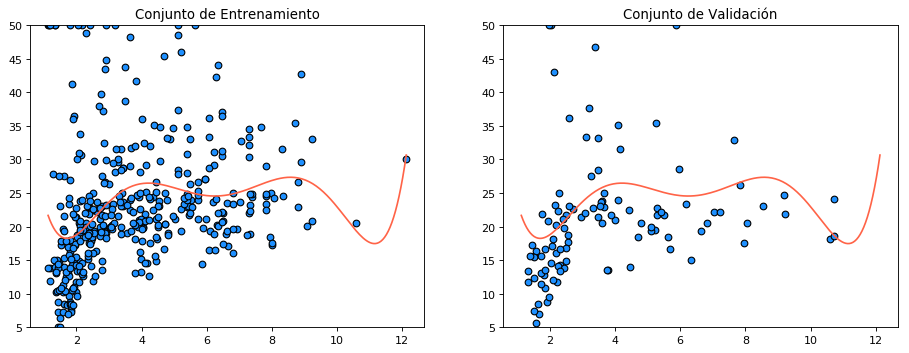

Grado del polinomio:  7
Media del error cuadrado para entrenamiento: 75.08
Media del error cuadrado para validación: 69.36 



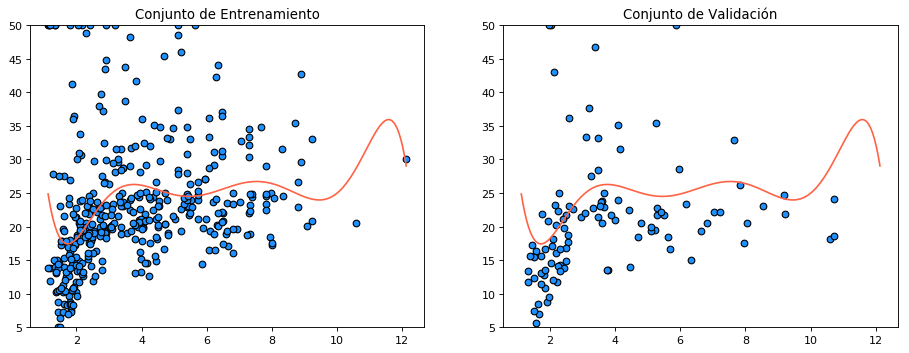

Grado del polinomio:  8
Media del error cuadrado para entrenamiento: 71.77
Media del error cuadrado para validación: 67.78 



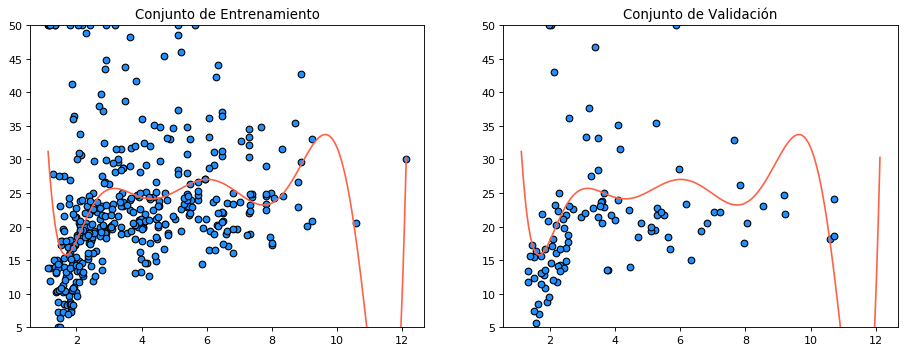

Grado del polinomio:  9
Media del error cuadrado para entrenamiento: 70.95
Media del error cuadrado para validación: 66.32 



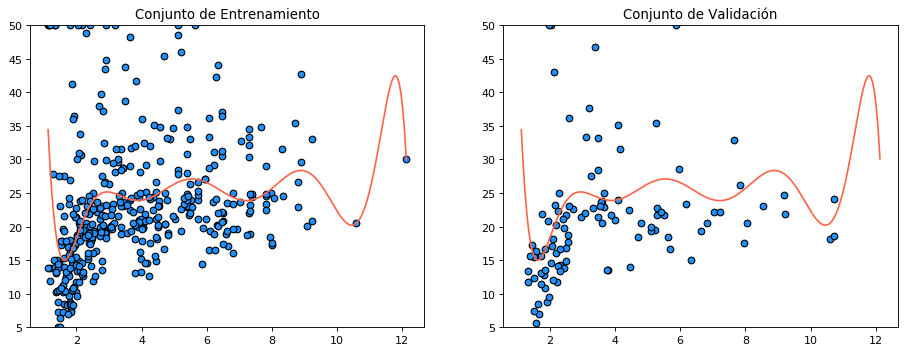

Grado del polinomio:  10
Media del error cuadrado para entrenamiento: 70.95
Media del error cuadrado para validación: 66.34 



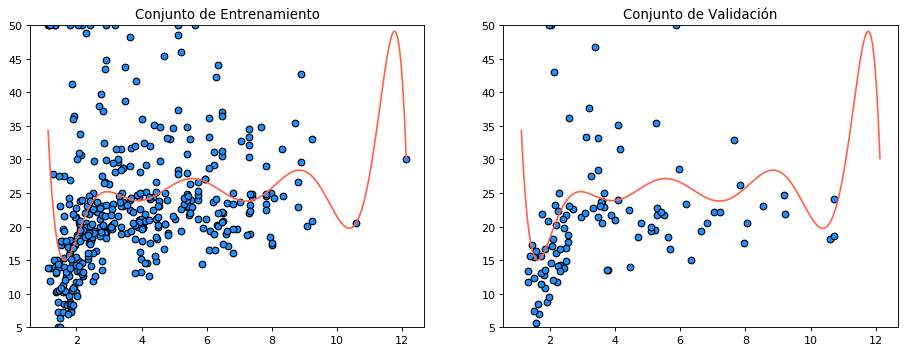

Grado del polinomio:  11
Media del error cuadrado para entrenamiento: 70.92
Media del error cuadrado para validación: 66.49 



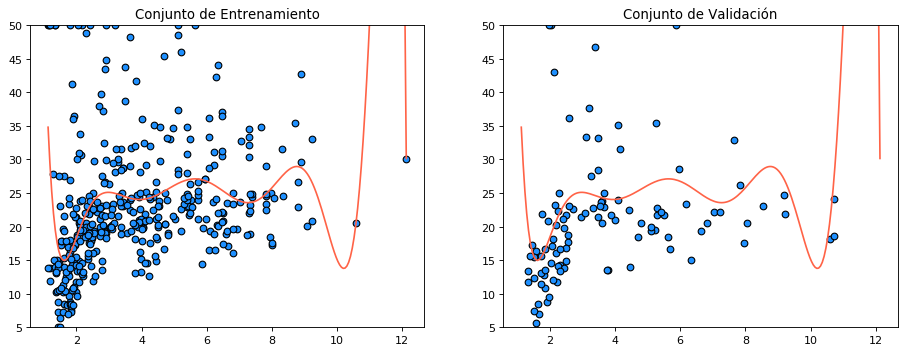

Grado del polinomio:  12
Media del error cuadrado para entrenamiento: 71.03
Media del error cuadrado para validación: 66.90 



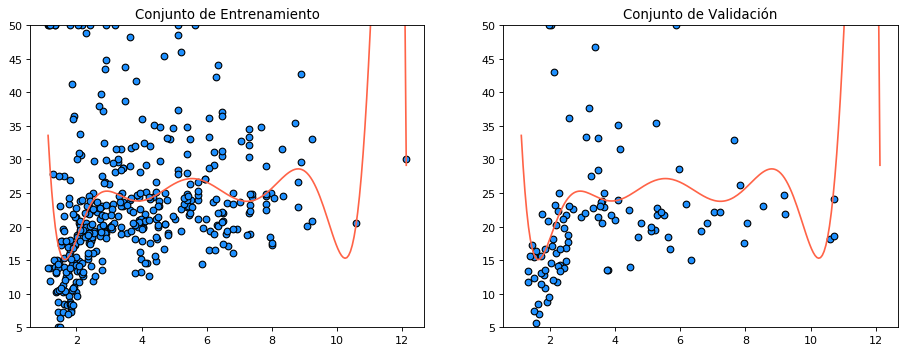

Grado del polinomio:  13
Media del error cuadrado para entrenamiento: 71.25
Media del error cuadrado para validación: 72.55 



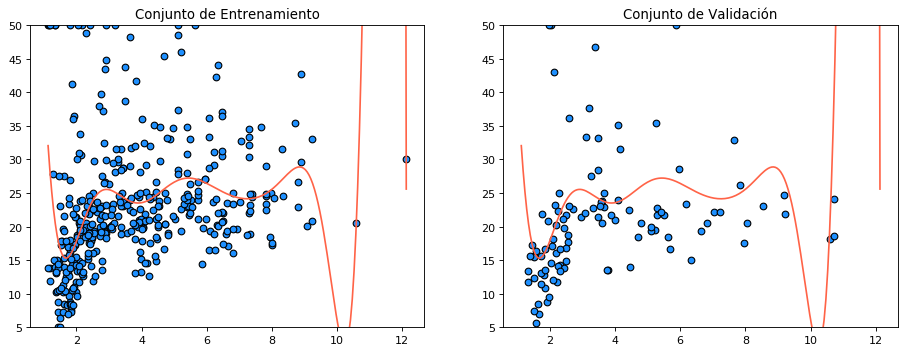

Grado del polinomio:  14
Media del error cuadrado para entrenamiento: 71.44
Media del error cuadrado para validación: 174.76 



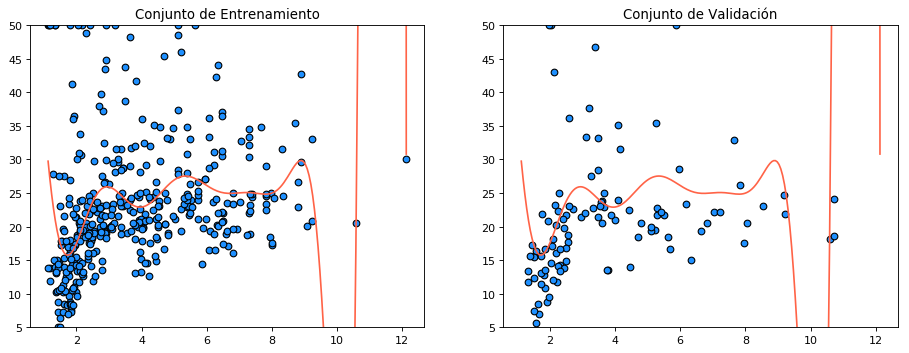

Grado del polinomio:  15
Media del error cuadrado para entrenamiento: 75.80
Media del error cuadrado para validación: 155.96 



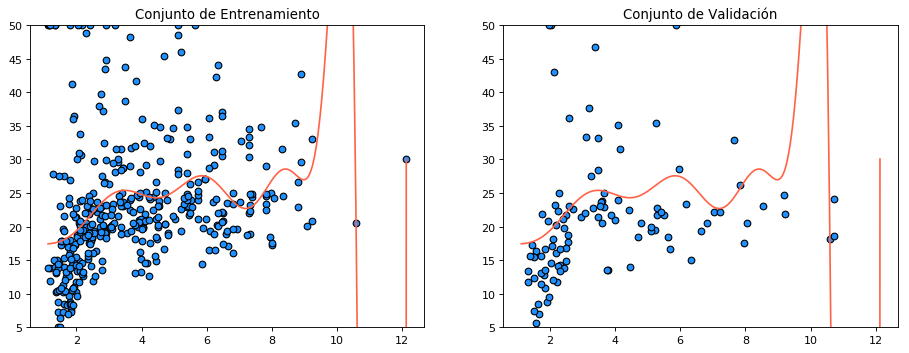

Grado del polinomio:  16
Media del error cuadrado para entrenamiento: 75.65
Media del error cuadrado para validación: 132.15 



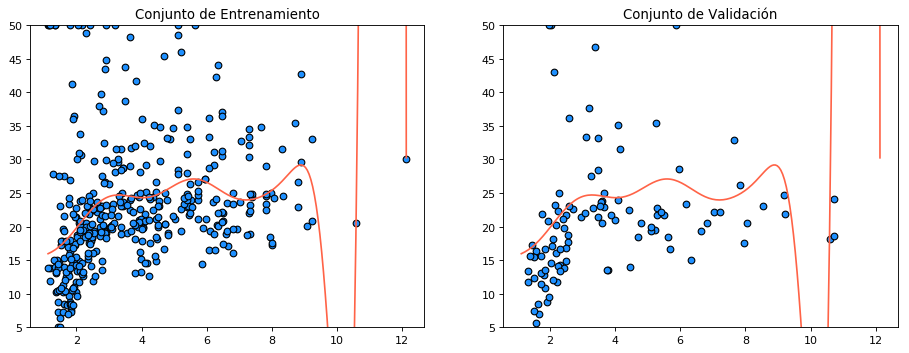

Grado del polinomio:  17
Media del error cuadrado para entrenamiento: 77.63
Media del error cuadrado para validación: 418.38 



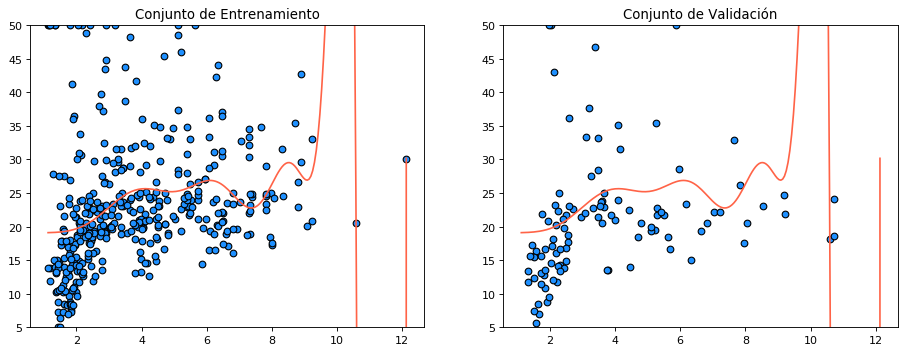

Grado del polinomio:  18
Media del error cuadrado para entrenamiento: 78.56
Media del error cuadrado para validación: 310.65 



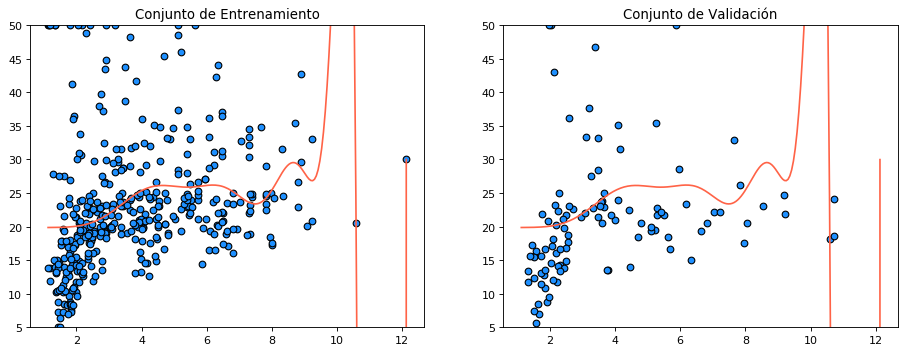

Grado del polinomio:  19
Media del error cuadrado para entrenamiento: 79.41
Media del error cuadrado para validación: 1569.42 



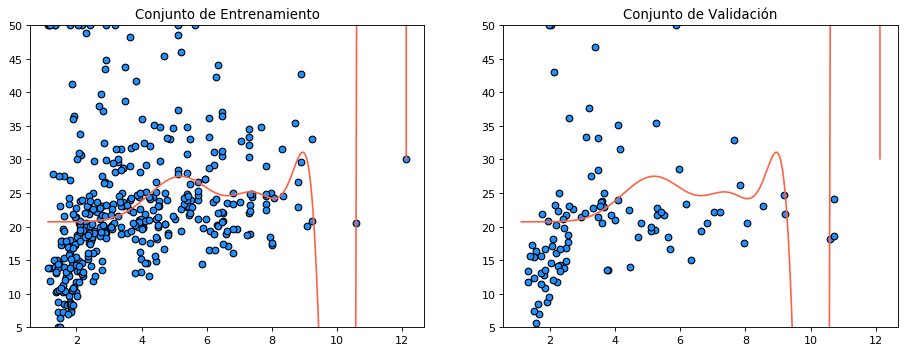

Grado del polinomio:  20
Media del error cuadrado para entrenamiento: 79.60
Media del error cuadrado para validación: 4698.08 



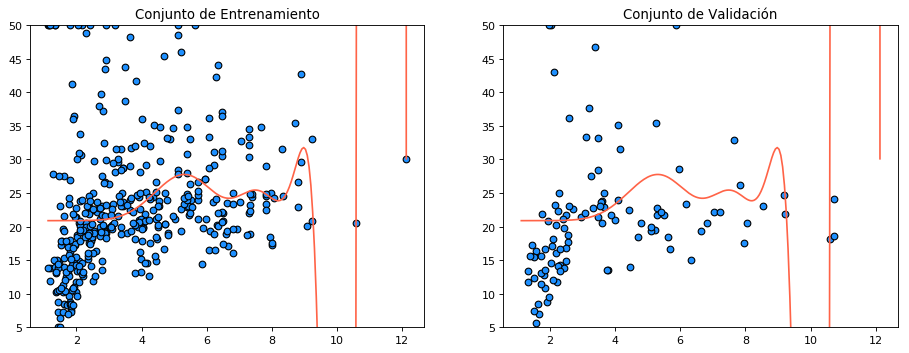

Grado del polinomio:  21
Media del error cuadrado para entrenamiento: 79.84
Media del error cuadrado para validación: 13488.32 



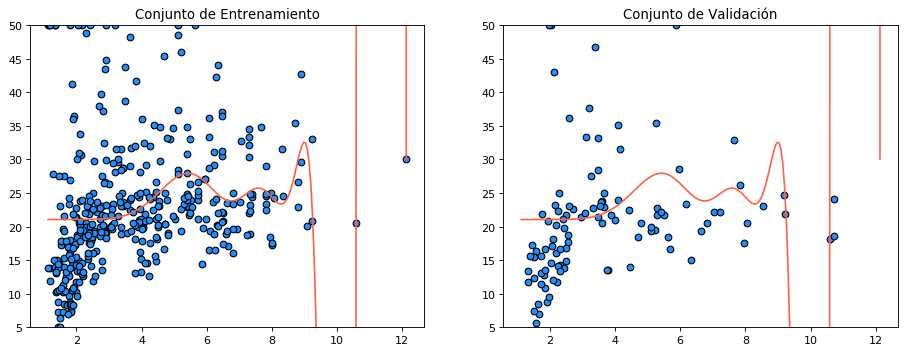

Grado del polinomio:  22
Media del error cuadrado para entrenamiento: 80.18
Media del error cuadrado para validación: 35095.45 



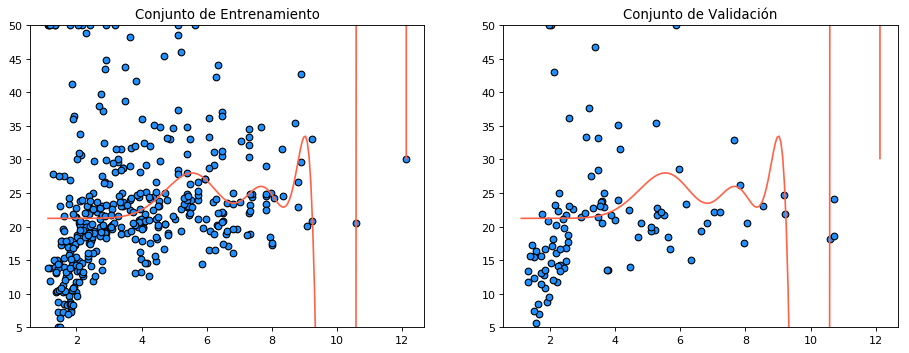

Grado del polinomio:  23
Media del error cuadrado para entrenamiento: 80.63
Media del error cuadrado para validación: 86391.92 



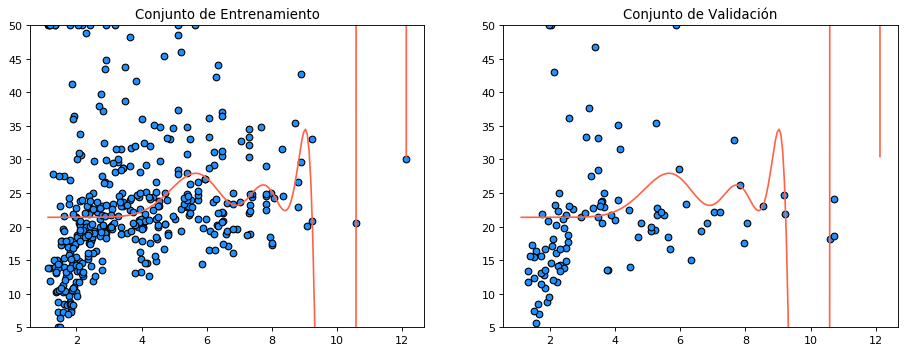

Grado del polinomio:  24
Media del error cuadrado para entrenamiento: 82.86
Media del error cuadrado para validación: 6442.34 



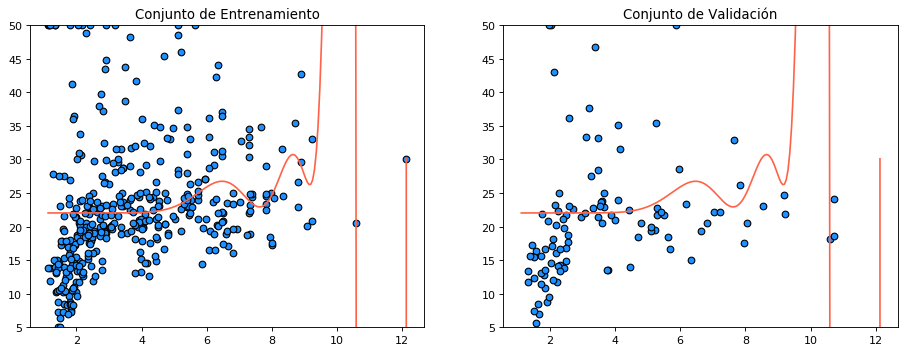

In [160]:
mce_train = []
mce_valid = []

for x in range(1,25):
    print('Grado del polinomio: ', x)
    poly_features = PolynomialFeatures(x)
    
    poly_features.fit(X_train_feature)
    X_poly_train = poly_features.transform(X_train_feature)
    X_poly_val = poly_features.transform(X_val_feature)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    print('Media del error cuadrado para entrenamiento: %.2f' % 
      mean_squared_error(y_train, model.predict(X_poly_train)))
    print('Media del error cuadrado para validación: %.2f' %
      mean_squared_error(y_val, model.predict(X_poly_val)), '\n') 
    plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

    mce_train.append(mean_squared_error(y_train, model.predict(X_poly_train)))
    mce_valid.append(mean_squared_error(y_val, model.predict(X_poly_val)))
    
    X_range_start = np.min(np.r_[X_train_feature, X_val_feature])
    X_range_stop = np.max(np.r_[X_train_feature, X_val_feature])
    y_range_start = np.min(np.r_[y_train, y_val])
    y_range_stop = np.max(np.r_[y_train, y_val])
    X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)
    X_linspace_poly = poly_features.transform(X_linspace)

    # Conjunto de entrenamiento
    plt.subplot(1, 2, 1)
    plt.scatter(X_train_feature, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
    plt.ylim(y_range_start, y_range_stop)
    plt.title("Conjunto de Entrenamiento")

    # Conjunto de validación
    plt.subplot(1, 2, 2)
    plt.scatter(X_val_feature, y_val, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
    plt.ylim(y_range_start, y_range_stop)
    plt.title("Conjunto de Validación")

    plt.show()
    

In [11]:
mce = pd.DataFrame(mce_train, mce_valid).reset_index()
mce.rename(columns={'index':'MCE Train', 0:'MCE Valid'}, inplace=True)


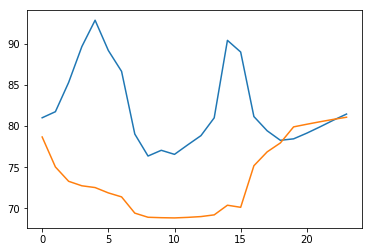

In [12]:
plt.plot(mce)

##### Visualización de la regresión polinomial

In [14]:
# plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

# X_range_start = np.min(np.r_[X_train_feature, X_val_feature])
# X_range_stop = np.max(np.r_[X_train_feature, X_val_feature])
# y_range_start = np.min(np.r_[y_train, y_val])
# y_range_stop = np.max(np.r_[y_train, y_val])
# X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)
# X_linspace_poly = poly_features.transform(X_linspace)

# # Conjunto de entrenamiento
# plt.subplot(1, 2, 1)
# plt.scatter(X_train_feature, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
# plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
# plt.ylim(y_range_start, y_range_stop)
# plt.title("Conjunto de Entrenamiento")

# # Conjunto de validación
# plt.subplot(1, 2, 2)
# plt.scatter(X_val_feature, y_val, facecolor="dodgerblue", edgecolor="k", label="datos")
# plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
# plt.ylim(y_range_start, y_range_stop)
# plt.title("Conjunto de Validación")

# plt.show()

### Regresión lineal con regularización

- https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

Valor del término de regularización 1e-05
Media del error cuadrado para entrenamiento: 78.66
Media del error cuadrado para validación: 81.00


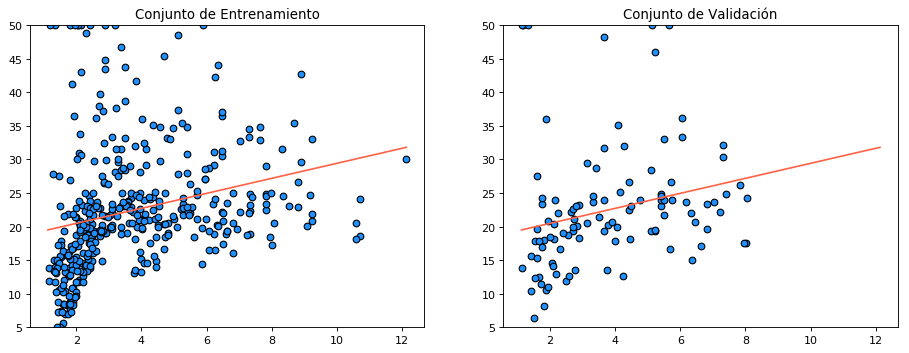

Valor del término de regularización 0.0001
Media del error cuadrado para entrenamiento: 78.66
Media del error cuadrado para validación: 81.00


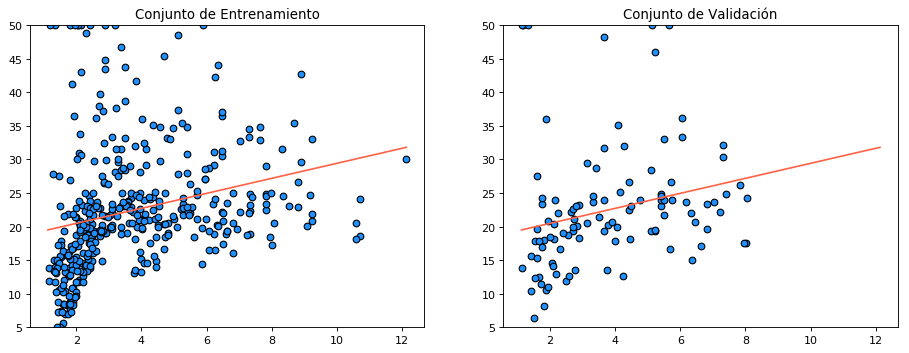

Valor del término de regularización 0.001
Media del error cuadrado para entrenamiento: 78.66
Media del error cuadrado para validación: 81.00


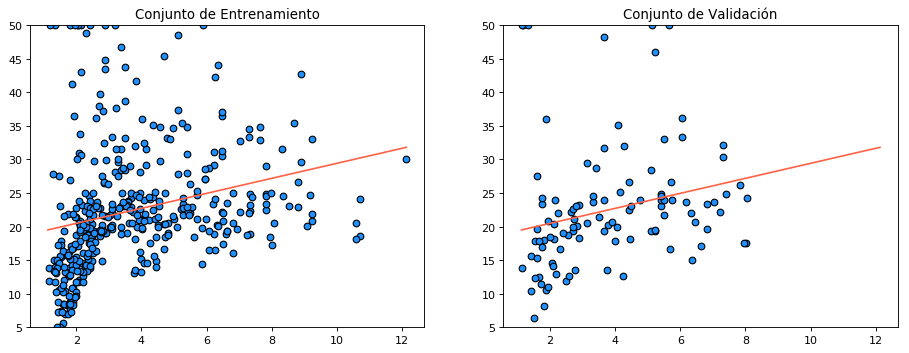

Valor del término de regularización 0.01
Media del error cuadrado para entrenamiento: 78.66
Media del error cuadrado para validación: 81.00


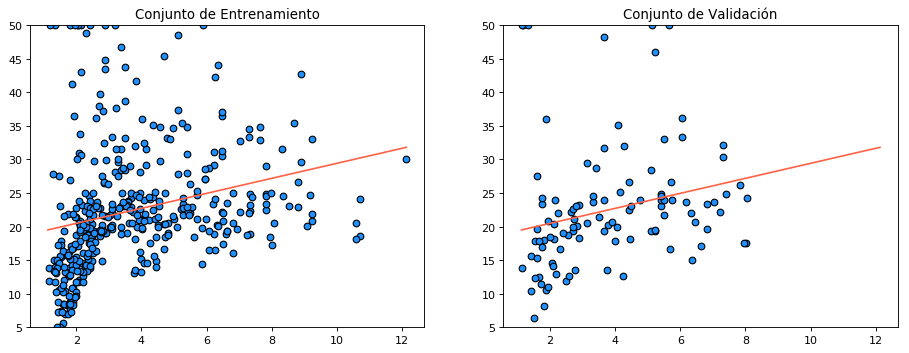

Valor del término de regularización 0.1
Media del error cuadrado para entrenamiento: 78.66
Media del error cuadrado para validación: 81.00


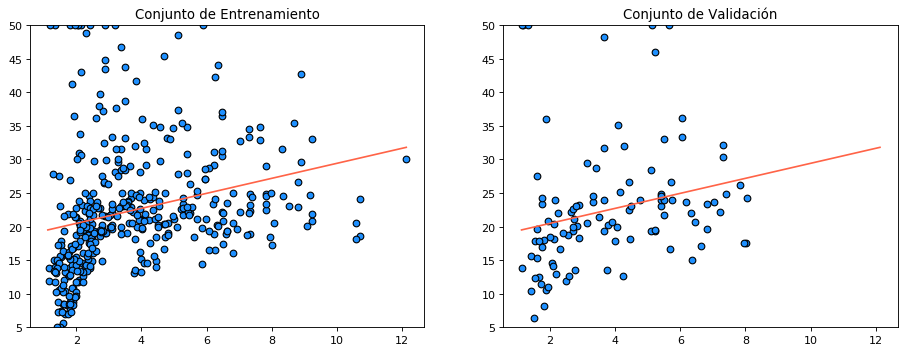

Valor del término de regularización 1.0
Media del error cuadrado para entrenamiento: 78.66
Media del error cuadrado para validación: 81.00


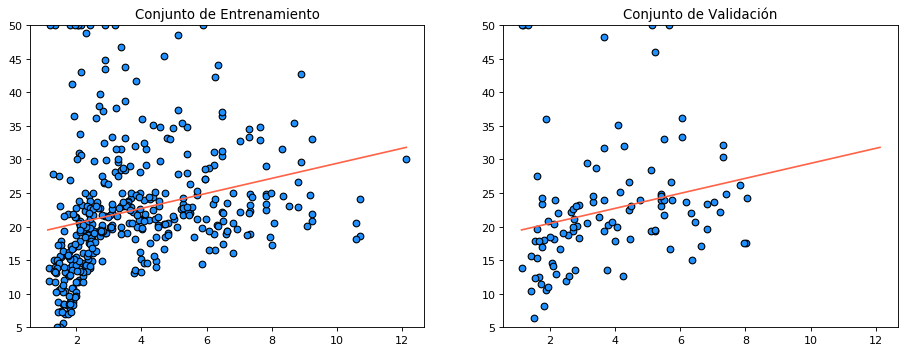

Valor del término de regularización 10.0
Media del error cuadrado para entrenamiento: 78.66
Media del error cuadrado para validación: 80.99


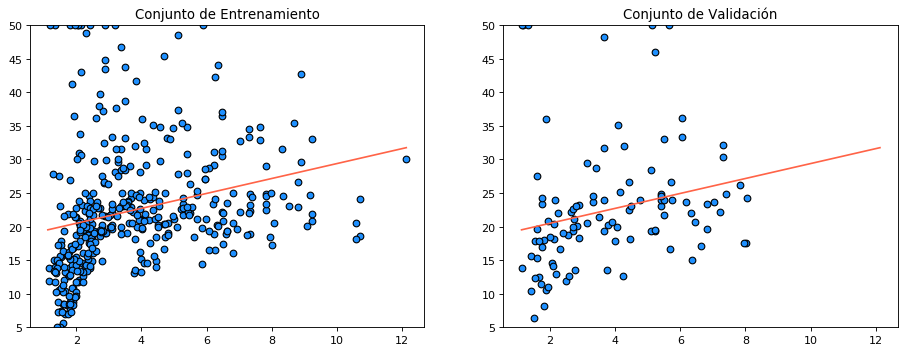

Valor del término de regularización 100.0
Media del error cuadrado para entrenamiento: 78.68
Media del error cuadrado para validación: 80.94


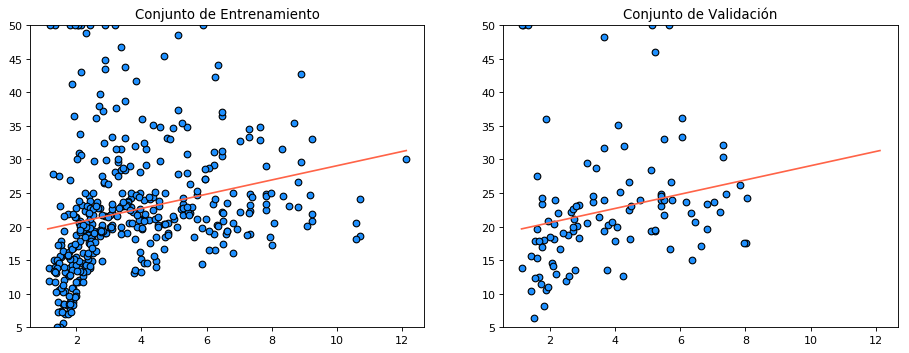

Valor del término de regularización 1000.0
Media del error cuadrado para entrenamiento: 79.38
Media del error cuadrado para validación: 81.13


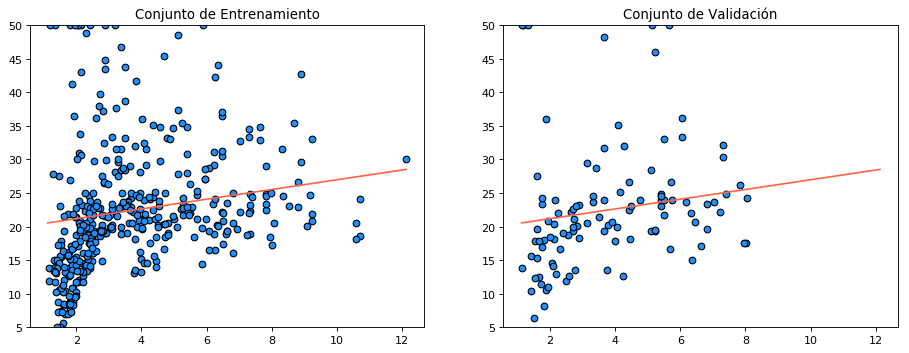

Valor del término de regularización 10000.0
Media del error cuadrado para entrenamiento: 82.77
Media del error cuadrado para validación: 83.28


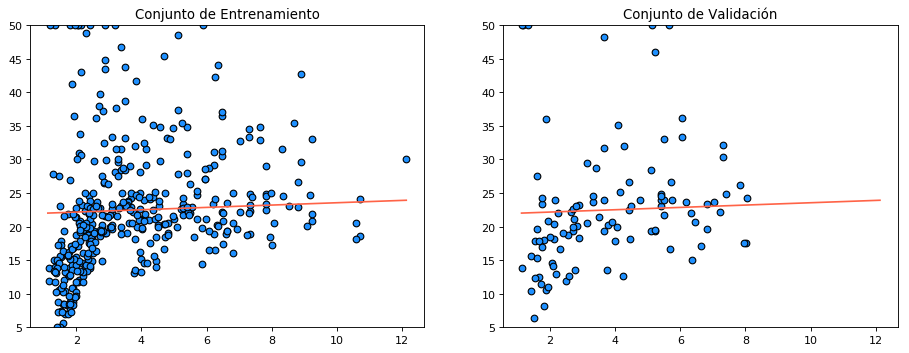

In [16]:
mce_train_reg = []
mce_valid_reg = []


for alpha in [10**c for c in np.arange(-5,5, dtype=float)]:

    model = Ridge(alpha=alpha)
    model.fit(X_train_feature, y_train)
    print('Valor del término de regularización', alpha)
    print('Media del error cuadrado para entrenamiento: %.2f' % 
          mean_squared_error(y_train, model.predict(X_train_feature)))
    print('Media del error cuadrado para validación: %.2f' %
          mean_squared_error(y_val, model.predict(X_val_feature)))
    
    mce_train_reg.append(mean_squared_error(y_train, model.predict(X_train_feature)))
    mce_valid_reg.append(mean_squared_error(y_val, model.predict(X_val_feature)))
    
    plt.figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')

    X_range_start = np.min(np.r_[X_train_feature, X_val_feature])
    X_range_stop = np.max(np.r_[X_train_feature, X_val_feature])
    y_range_start = np.min(np.r_[y_train, y_val])
    y_range_stop = np.max(np.r_[y_train, y_val])
    X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)

    # Conjunto de entrenamiento
    plt.subplot(1, 2, 1)
    plt.scatter(X_train_feature, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
    plt.ylim(y_range_start, y_range_stop)
    plt.title("Conjunto de Entrenamiento")

    # Conjunto de validación
    plt.subplot(1, 2, 2)
    plt.scatter(X_val_feature, y_val, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
    plt.ylim(y_range_start, y_range_stop)
    plt.title("Conjunto de Validación")

    plt.show()

##### Visualización de la regresión lineal

In [17]:
# plt.figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')

# X_range_start = np.min(np.r_[X_train_feature, X_val_feature])
# X_range_stop = np.max(np.r_[X_train_feature, X_val_feature])
# y_range_start = np.min(np.r_[y_train, y_val])
# y_range_stop = np.max(np.r_[y_train, y_val])
# X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)

# # Conjunto de entrenamiento
# plt.subplot(1, 2, 1)
# plt.scatter(X_train_feature, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
# plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
# plt.ylim(y_range_start, y_range_stop)
# plt.title("Conjunto de Entrenamiento")

# # Conjunto de validación
# plt.subplot(1, 2, 2)
# plt.scatter(X_val_feature, y_val, facecolor="dodgerblue", edgecolor="k", label="datos")
# plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
# plt.ylim(y_range_start, y_range_stop)
# plt.title("Conjunto de Validación")

# plt.show()

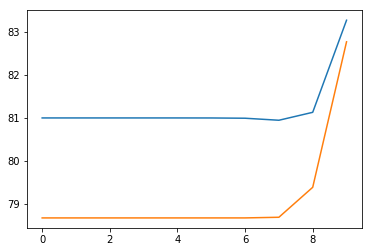

In [18]:
mce_lin = pd.DataFrame(mce_train_reg, mce_valid_reg).reset_index()
mce_lin.rename(columns={'index':'MCE Train', 0:'MCE Valid'}, inplace=True)
plt.plot(mce_lin)



### Regresión polinomial con regularización

In [69]:
mce_train_reg_pol=pd.DataFrame(columns=[list(range(8,20))],index=[10**c for c in np.arange(-15,-2, dtype=float)])
mce_valid_reg_pol=pd.DataFrame(columns=[list(range(8,20))],index=[10**c for c in np.arange(-15,-2, dtype=float)])


Grado del polinomio:  8  Valor del Alpha:  1e-07
Media del error cuadrado para entrenamiento: 69.43
Media del error cuadrado para validación: 79.02


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.6581e-25): result may not be accurate.
  overwrite_a=True).T


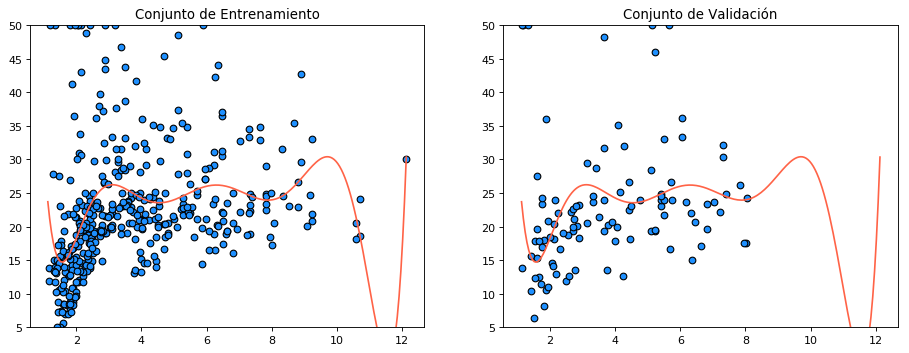

Grado del polinomio:  8  Valor del Alpha:  1e-06
Media del error cuadrado para entrenamiento: 69.43
Media del error cuadrado para validación: 79.03


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.6581e-24): result may not be accurate.
  overwrite_a=True).T


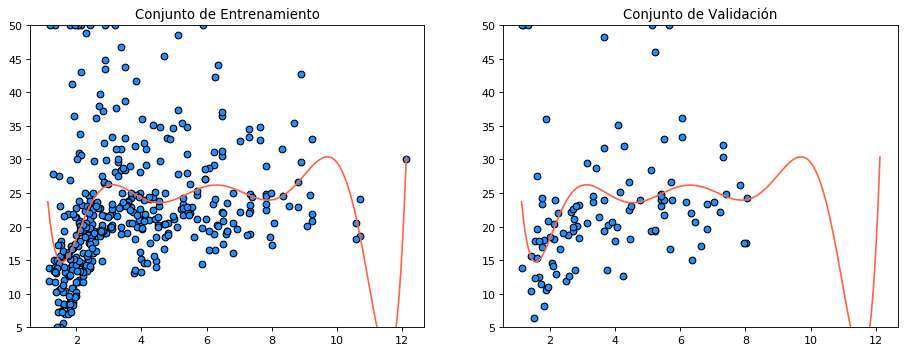

Grado del polinomio:  8  Valor del Alpha:  1e-05
Media del error cuadrado para entrenamiento: 69.43
Media del error cuadrado para validación: 79.07


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.6581e-23): result may not be accurate.
  overwrite_a=True).T


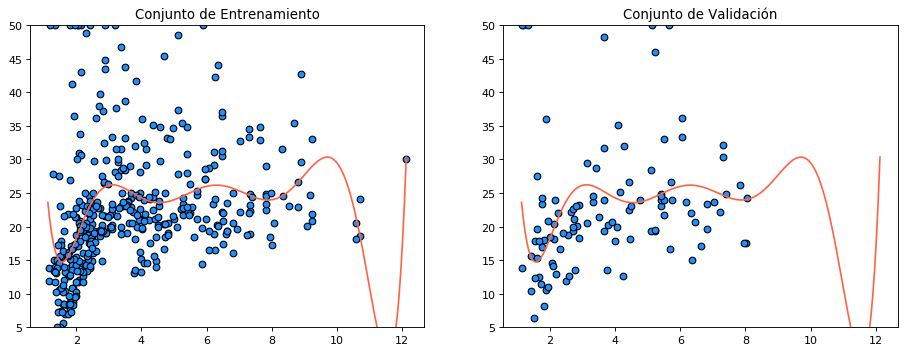

Grado del polinomio:  8  Valor del Alpha:  0.0001
Media del error cuadrado para entrenamiento: 69.44
Media del error cuadrado para validación: 79.55


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.6581e-22): result may not be accurate.
  overwrite_a=True).T


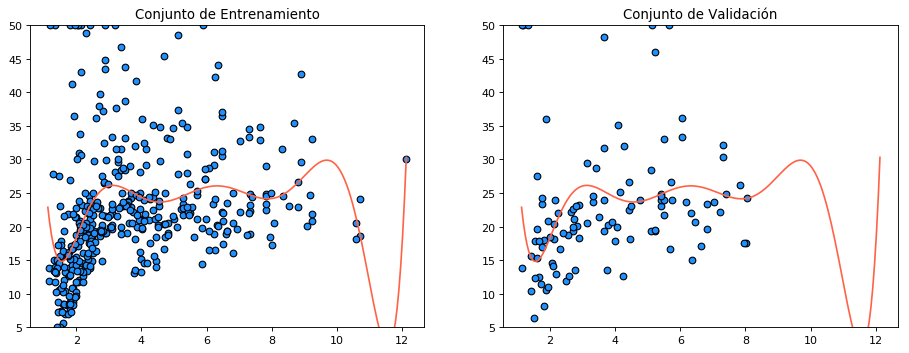

Grado del polinomio:  8  Valor del Alpha:  0.001
Media del error cuadrado para entrenamiento: 69.92
Media del error cuadrado para validación: 83.02


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.6581e-21): result may not be accurate.
  overwrite_a=True).T


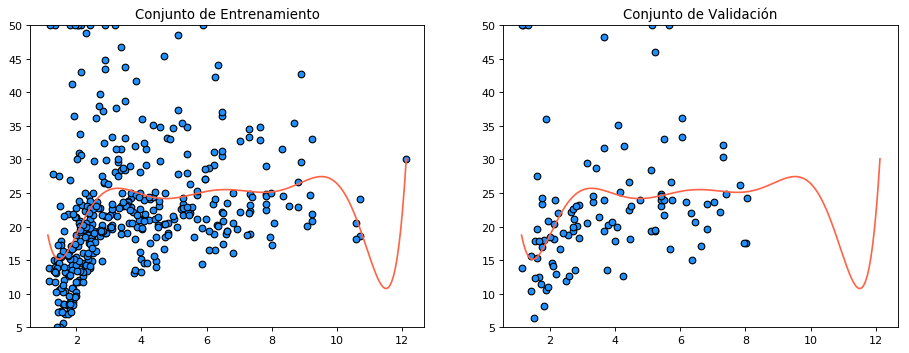

Grado del polinomio:  9  Valor del Alpha:  1e-07
Media del error cuadrado para entrenamiento: 68.92
Media del error cuadrado para validación: 76.36


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.00498e-27): result may not be accurate.
  overwrite_a=True).T


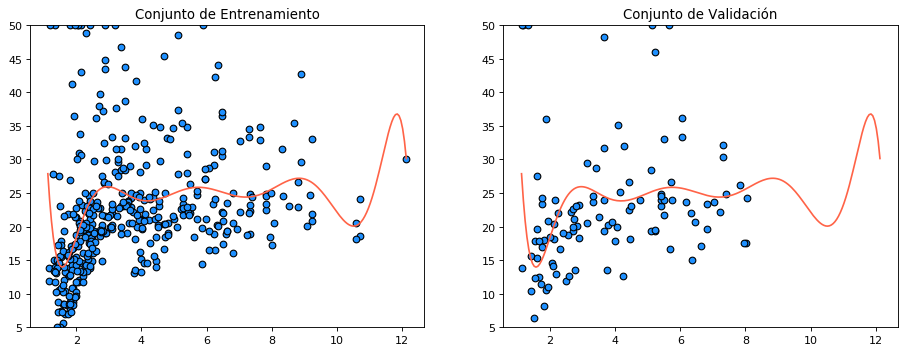

Grado del polinomio:  9  Valor del Alpha:  1e-06
Media del error cuadrado para entrenamiento: 68.92
Media del error cuadrado para validación: 76.38


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.00498e-26): result may not be accurate.
  overwrite_a=True).T


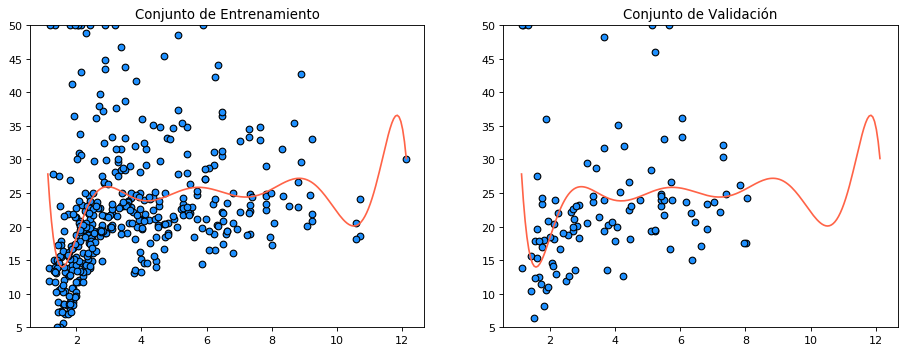

Grado del polinomio:  9  Valor del Alpha:  1e-05
Media del error cuadrado para entrenamiento: 68.93
Media del error cuadrado para validación: 76.60


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.00498e-25): result may not be accurate.
  overwrite_a=True).T


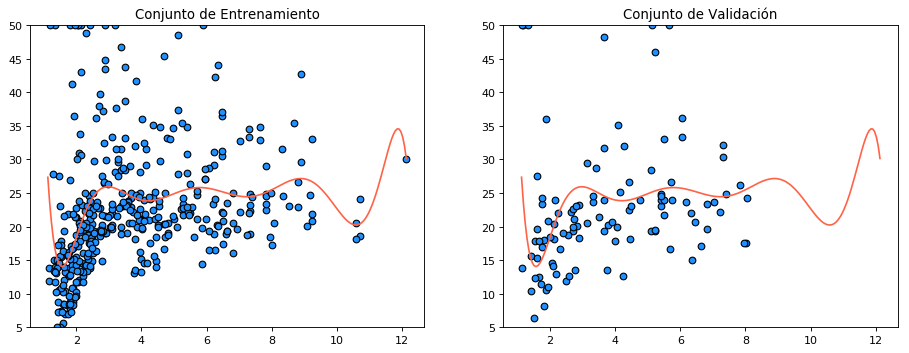

Grado del polinomio:  9  Valor del Alpha:  0.0001
Media del error cuadrado para entrenamiento: 69.12
Media del error cuadrado para validación: 78.39


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.00498e-24): result may not be accurate.
  overwrite_a=True).T


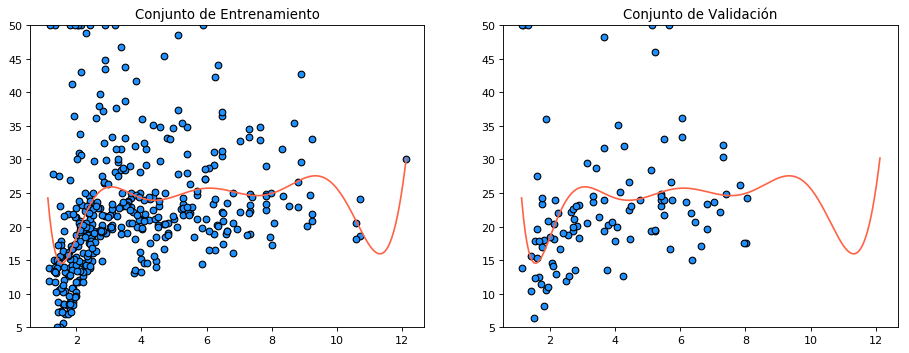

Grado del polinomio:  9  Valor del Alpha:  0.001
Media del error cuadrado para entrenamiento: 70.06
Media del error cuadrado para validación: 82.84


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.98679e-23): result may not be accurate.
  overwrite_a=True).T


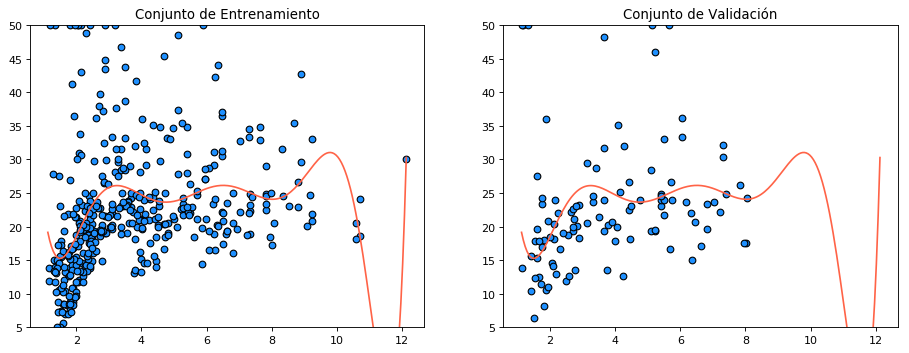

Grado del polinomio:  10  Valor del Alpha:  1e-07
Media del error cuadrado para entrenamiento: 68.87
Media del error cuadrado para validación: 77.08


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.47672e-29): result may not be accurate.
  overwrite_a=True).T


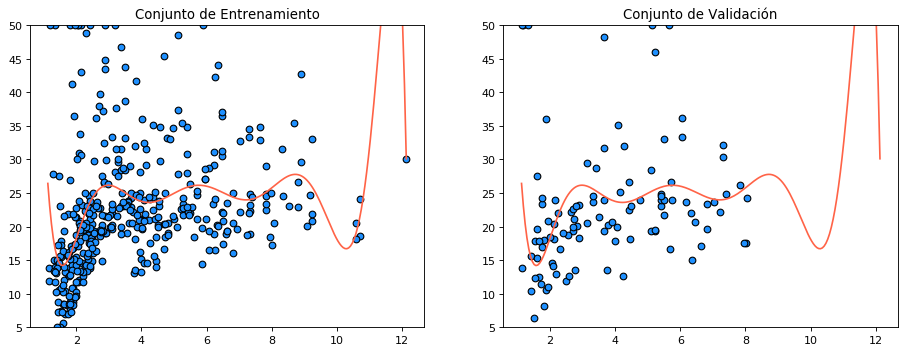

Grado del polinomio:  10  Valor del Alpha:  1e-06
Media del error cuadrado para entrenamiento: 68.87
Media del error cuadrado para validación: 77.13


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.47672e-28): result may not be accurate.
  overwrite_a=True).T


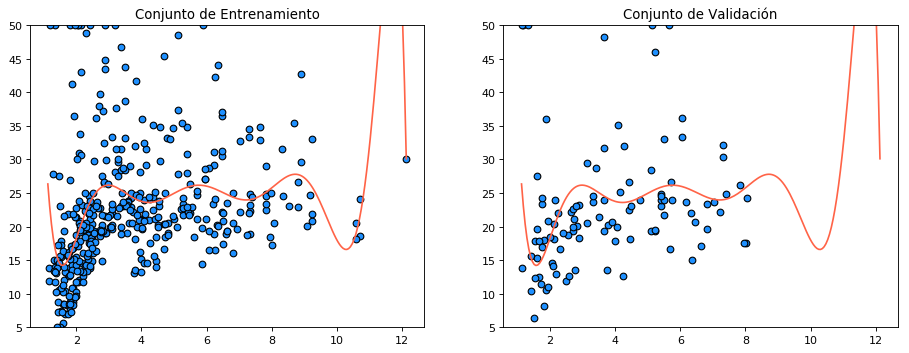

Grado del polinomio:  10  Valor del Alpha:  1e-05
Media del error cuadrado para entrenamiento: 68.88
Media del error cuadrado para validación: 77.43


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.47672e-27): result may not be accurate.
  overwrite_a=True).T


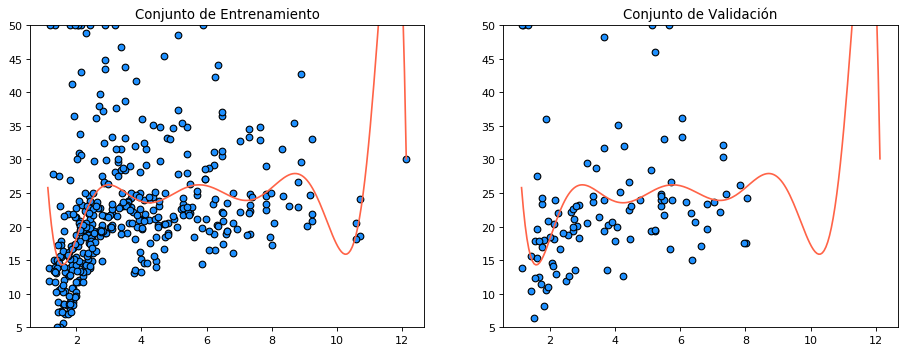

Grado del polinomio:  10  Valor del Alpha:  0.0001
Media del error cuadrado para entrenamiento: 68.92
Media del error cuadrado para validación: 78.30


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.47672e-26): result may not be accurate.
  overwrite_a=True).T


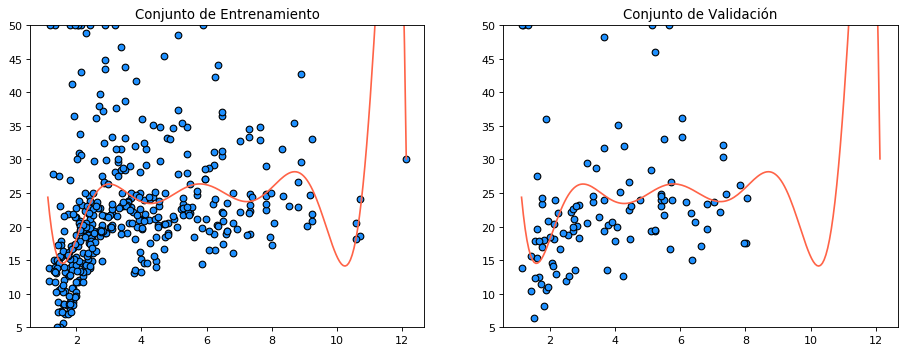

Grado del polinomio:  10  Valor del Alpha:  0.001
Media del error cuadrado para entrenamiento: 68.97
Media del error cuadrado para validación: 79.21


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.20458e-25): result may not be accurate.
  overwrite_a=True).T


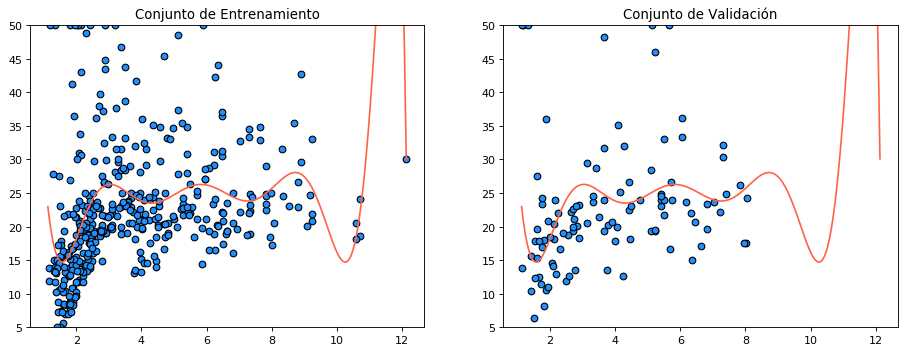

Grado del polinomio:  11  Valor del Alpha:  1e-07
Media del error cuadrado para entrenamiento: 68.84
Media del error cuadrado para validación: 76.58


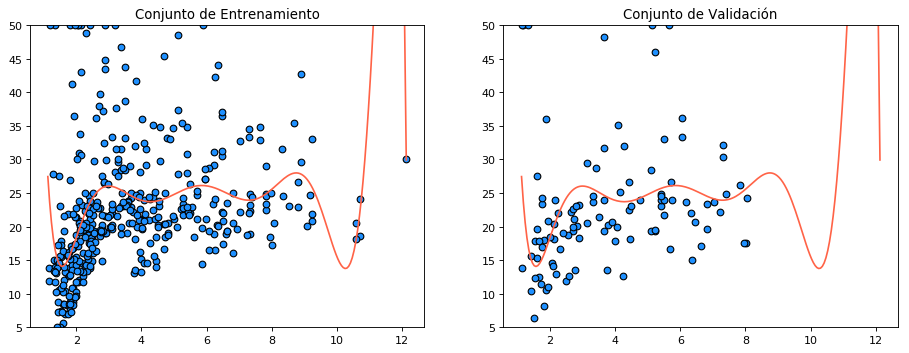

Grado del polinomio:  11  Valor del Alpha:  1e-06
Media del error cuadrado para entrenamiento: 68.85
Media del error cuadrado para validación: 76.74


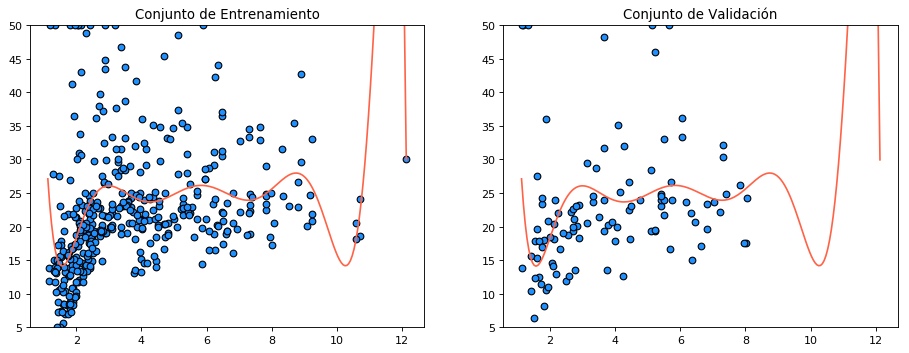

Grado del polinomio:  11  Valor del Alpha:  1e-05
Media del error cuadrado para entrenamiento: 68.89
Media del error cuadrado para validación: 77.51


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.0329e-30): result may not be accurate.
  overwrite_a=True).T


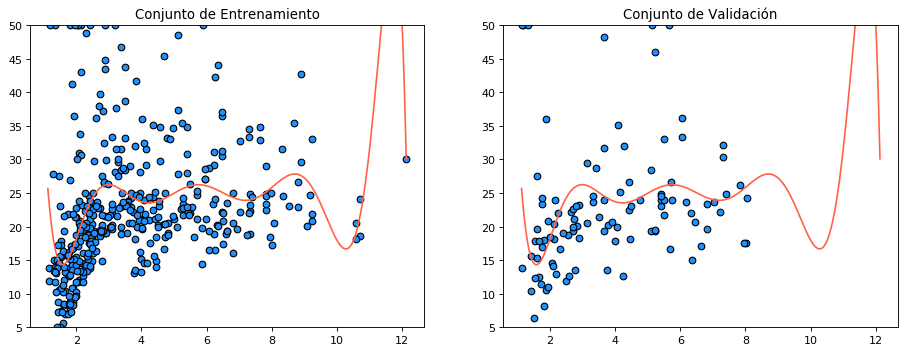

Grado del polinomio:  11  Valor del Alpha:  0.0001
Media del error cuadrado para entrenamiento: 68.93
Media del error cuadrado para validación: 77.79


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.12558e-29): result may not be accurate.
  overwrite_a=True).T


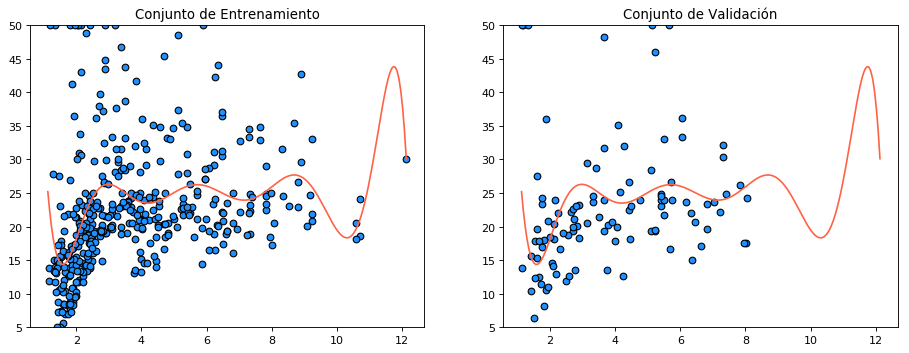

Grado del polinomio:  11  Valor del Alpha:  0.001
Media del error cuadrado para entrenamiento: 69.00
Media del error cuadrado para validación: 79.39


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.06821e-27): result may not be accurate.
  overwrite_a=True).T


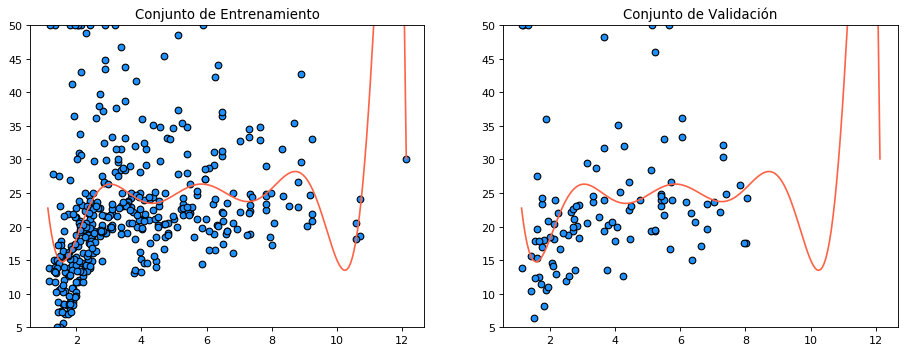

Grado del polinomio:  12  Valor del Alpha:  1e-07
Media del error cuadrado para entrenamiento: 68.76
Media del error cuadrado para validación: 75.79


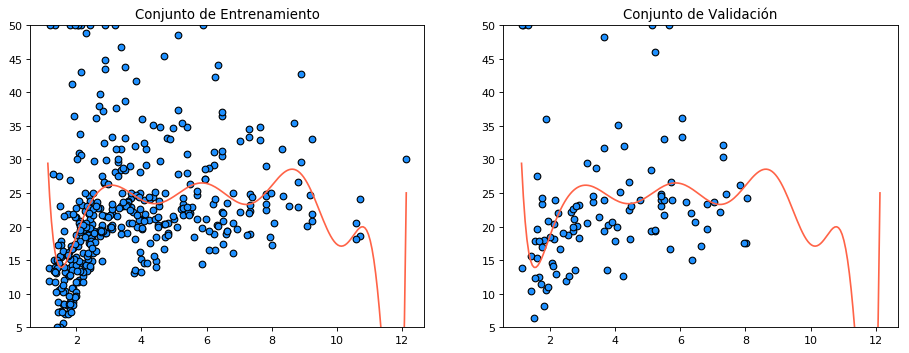

Grado del polinomio:  12  Valor del Alpha:  1e-06
Media del error cuadrado para entrenamiento: 68.77
Media del error cuadrado para validación: 76.52


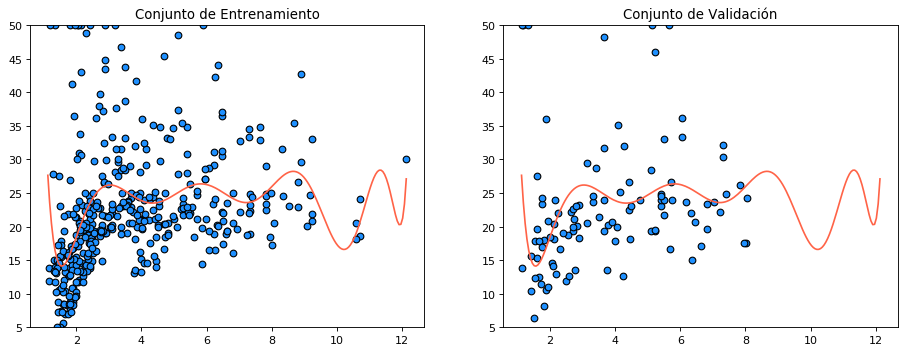

Grado del polinomio:  12  Valor del Alpha:  1e-05
Media del error cuadrado para entrenamiento: 68.87
Media del error cuadrado para validación: 77.52


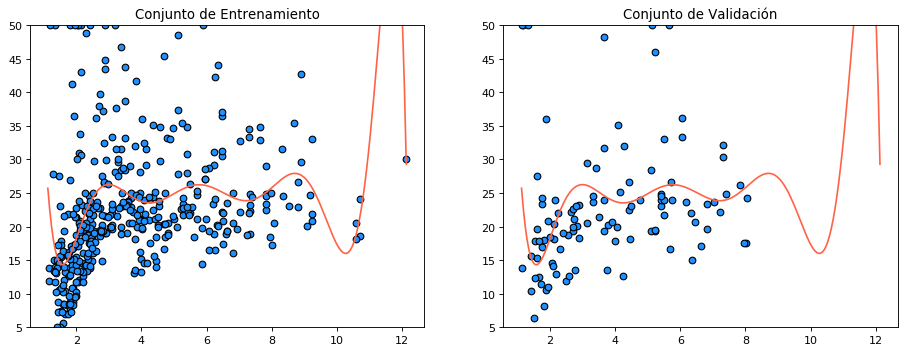

Grado del polinomio:  12  Valor del Alpha:  0.0001
Media del error cuadrado para entrenamiento: 68.92
Media del error cuadrado para validación: 78.14


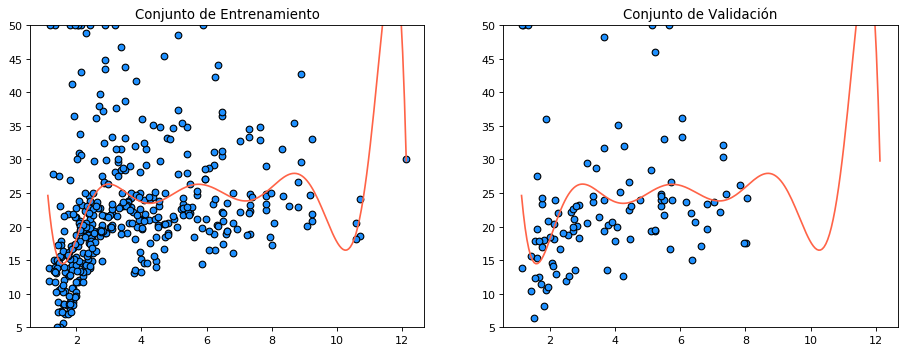

Grado del polinomio:  12  Valor del Alpha:  0.001
Media del error cuadrado para entrenamiento: 68.99
Media del error cuadrado para validación: 79.47


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.62107e-30): result may not be accurate.
  overwrite_a=True).T


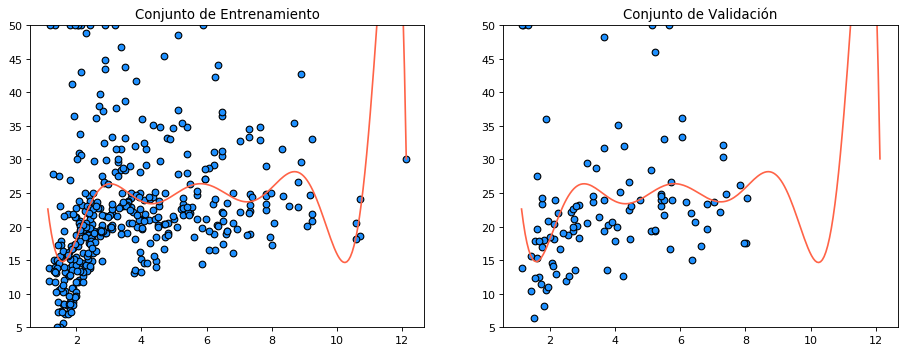

Grado del polinomio:  13  Valor del Alpha:  1e-07
Media del error cuadrado para entrenamiento: 71.25
Media del error cuadrado para validación: 70.36


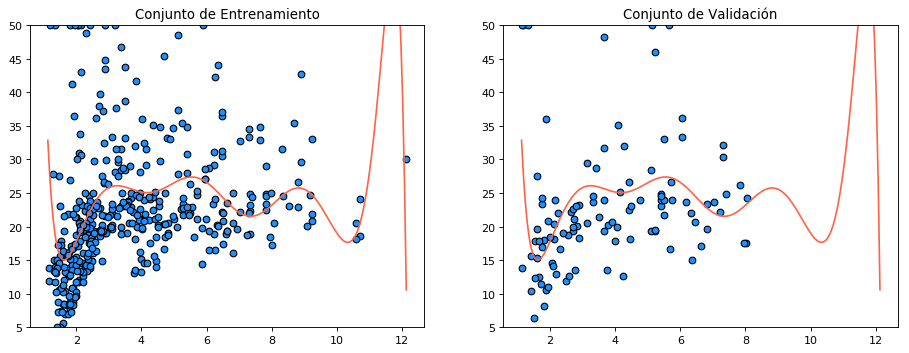

Grado del polinomio:  13  Valor del Alpha:  1e-06
Media del error cuadrado para entrenamiento: 69.04
Media del error cuadrado para validación: 74.10


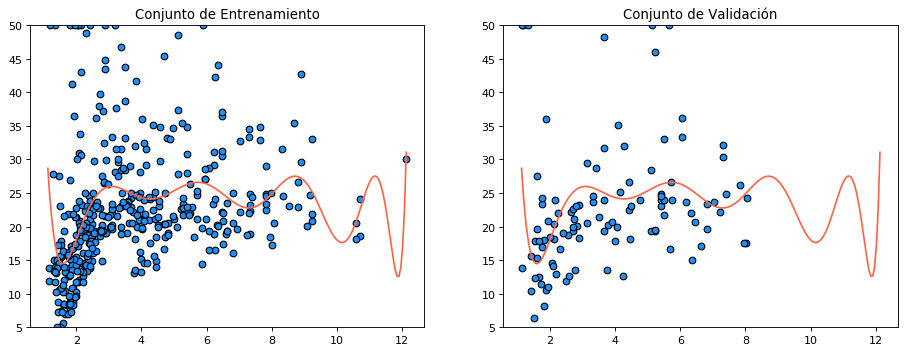

Grado del polinomio:  13  Valor del Alpha:  1e-05
Media del error cuadrado para entrenamiento: 69.03
Media del error cuadrado para validación: 75.99


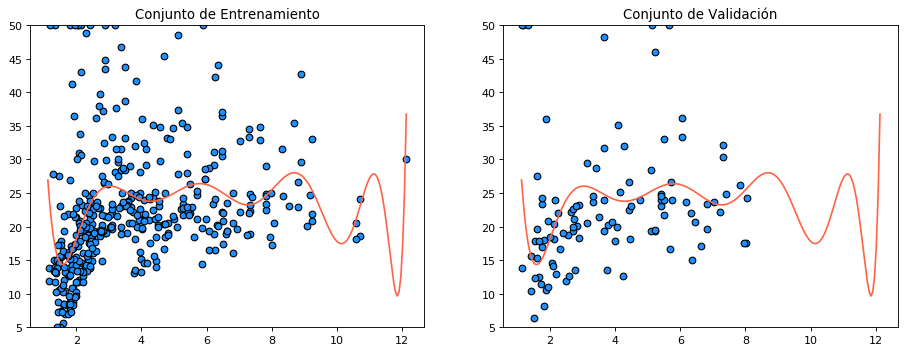

Grado del polinomio:  13  Valor del Alpha:  0.0001
Media del error cuadrado para entrenamiento: 68.97
Media del error cuadrado para validación: 77.54


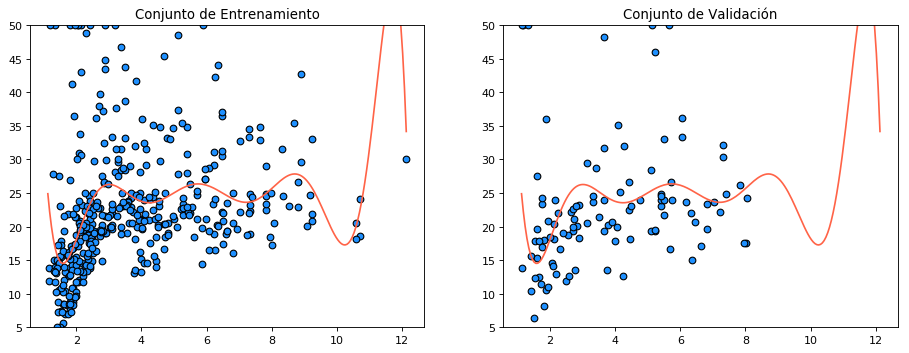

Grado del polinomio:  13  Valor del Alpha:  0.001
Media del error cuadrado para entrenamiento: 69.02
Media del error cuadrado para validación: 79.65


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.36441e-32): result may not be accurate.
  overwrite_a=True).T


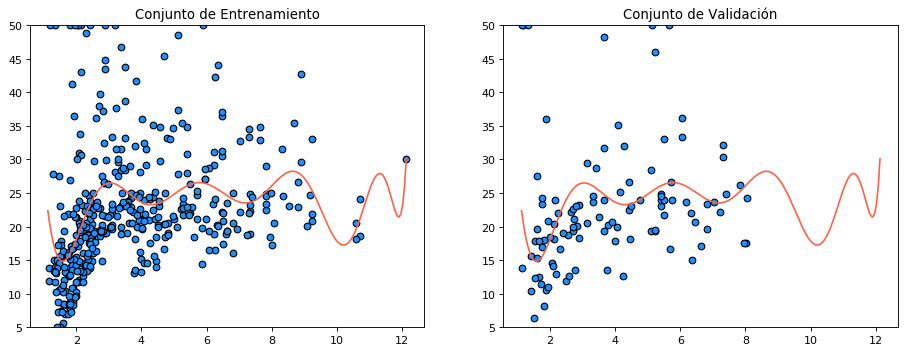

Grado del polinomio:  14  Valor del Alpha:  1e-07
Media del error cuadrado para entrenamiento: 82.19
Media del error cuadrado para validación: 84.39


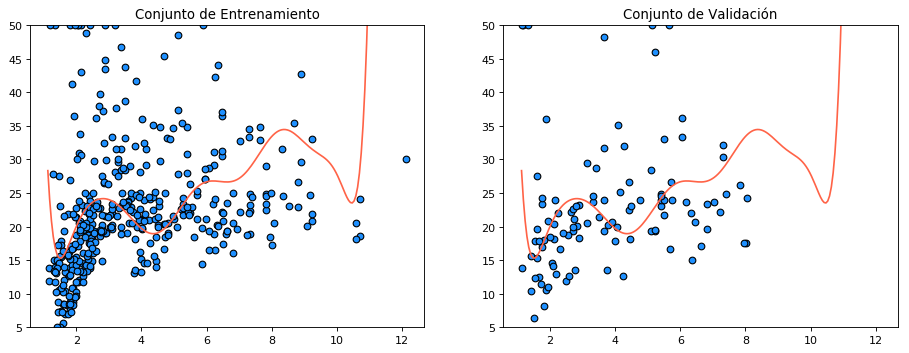

Grado del polinomio:  14  Valor del Alpha:  1e-06
Media del error cuadrado para entrenamiento: 84.77
Media del error cuadrado para validación: 87.02


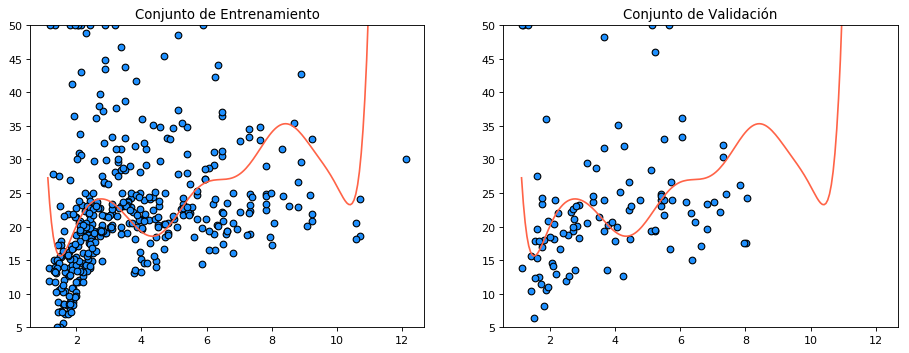

Grado del polinomio:  14  Valor del Alpha:  1e-05
Media del error cuadrado para entrenamiento: 87.67
Media del error cuadrado para validación: 91.37


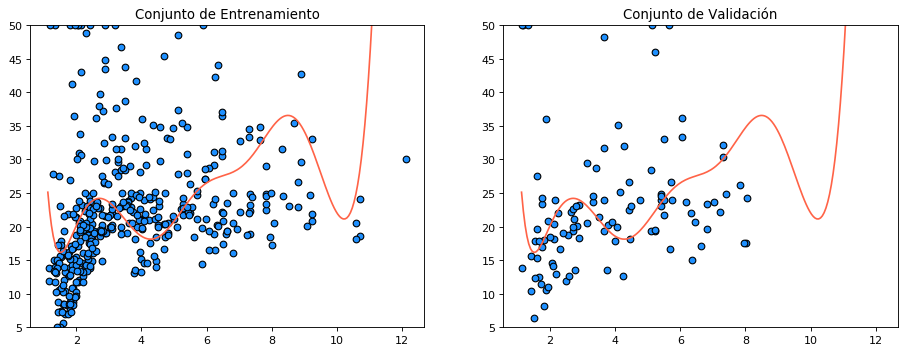

Grado del polinomio:  14  Valor del Alpha:  0.0001
Media del error cuadrado para entrenamiento: 75.23
Media del error cuadrado para validación: 84.56


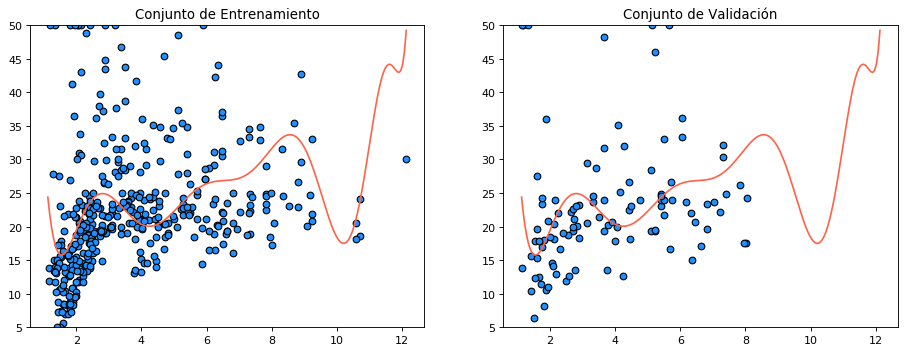

Grado del polinomio:  14  Valor del Alpha:  0.001
Media del error cuadrado para entrenamiento: 69.23
Media del error cuadrado para validación: 80.56


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.24129e-34): result may not be accurate.
  overwrite_a=True).T


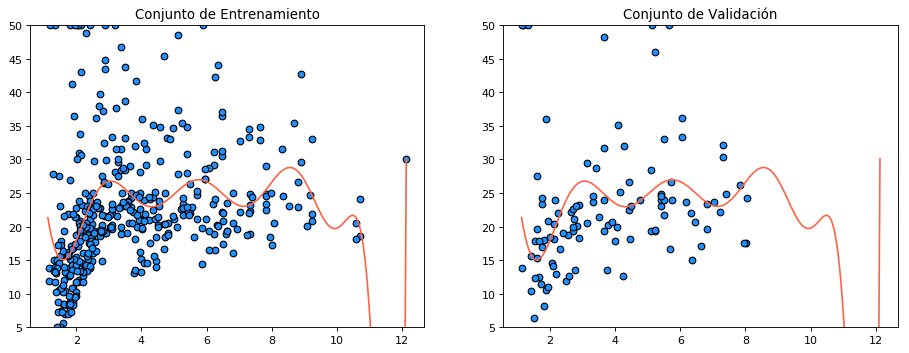

Grado del polinomio:  15  Valor del Alpha:  1e-07
Media del error cuadrado para entrenamiento: 3613.69
Media del error cuadrado para validación: 112.01


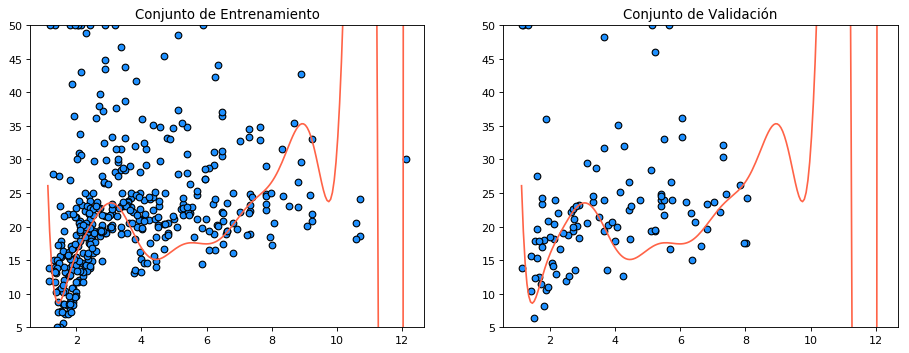

Grado del polinomio:  15  Valor del Alpha:  1e-06
Media del error cuadrado para entrenamiento: 1112.42
Media del error cuadrado para validación: 107.10


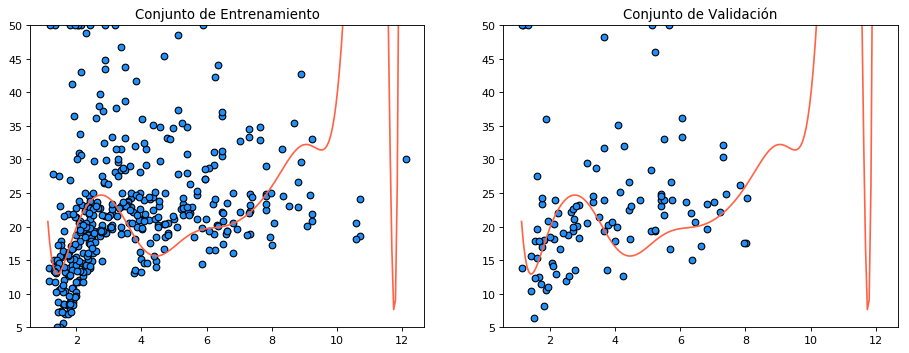

Grado del polinomio:  15  Valor del Alpha:  1e-05
Media del error cuadrado para entrenamiento: 440.64
Media del error cuadrado para validación: 109.72


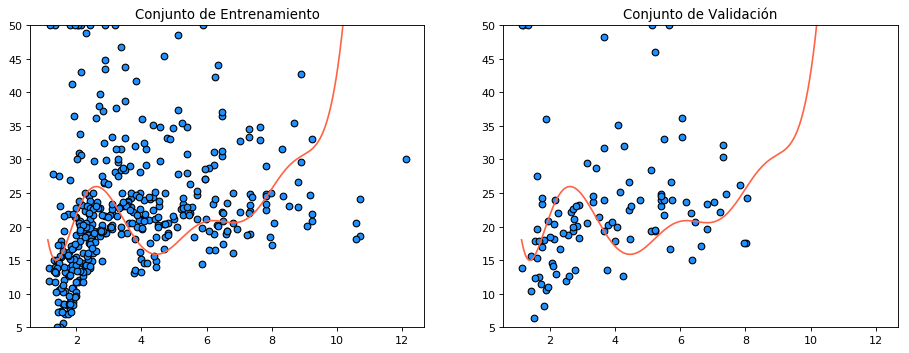

Grado del polinomio:  15  Valor del Alpha:  0.0001
Media del error cuadrado para entrenamiento: 361.29
Media del error cuadrado para validación: 110.93


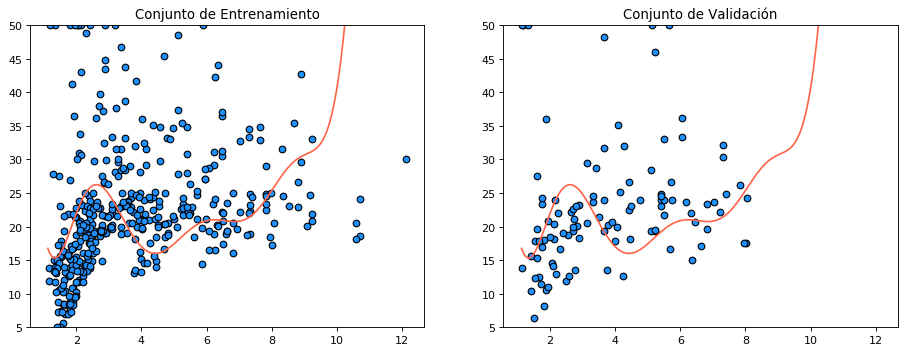

Grado del polinomio:  15  Valor del Alpha:  0.001
Media del error cuadrado para entrenamiento: 243.52
Media del error cuadrado para validación: 101.63


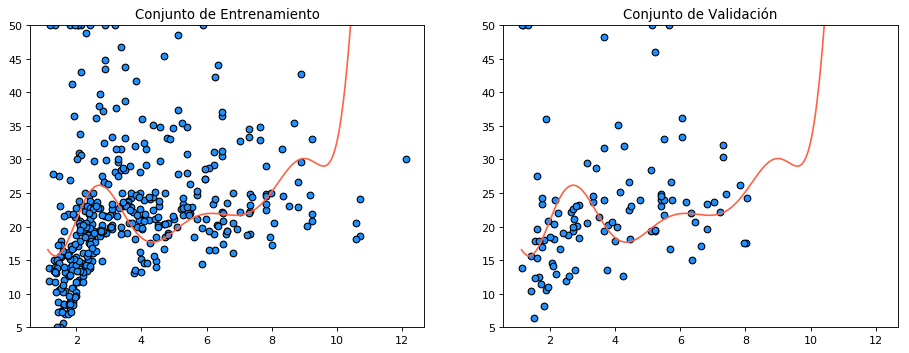

Grado del polinomio:  16  Valor del Alpha:  1e-07
Media del error cuadrado para entrenamiento: 64249.81
Media del error cuadrado para validación: 53915.59


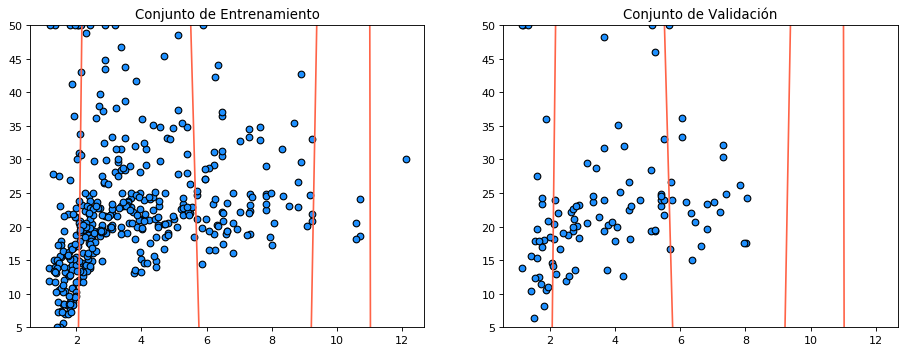

Grado del polinomio:  16  Valor del Alpha:  1e-06
Media del error cuadrado para entrenamiento: 61590.00
Media del error cuadrado para validación: 55680.26


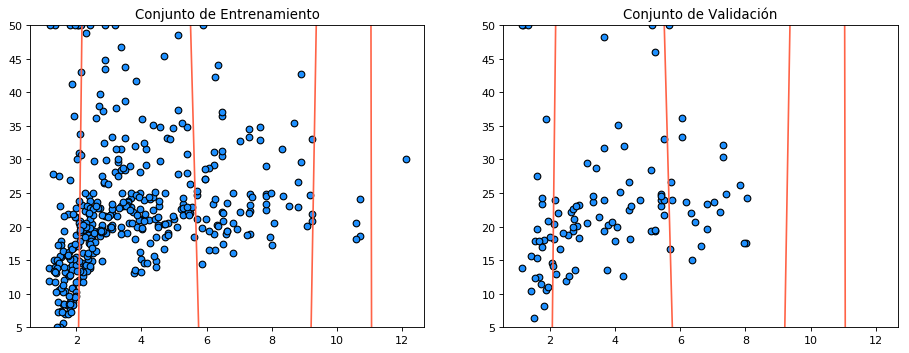

Grado del polinomio:  16  Valor del Alpha:  1e-05
Media del error cuadrado para entrenamiento: 59995.65
Media del error cuadrado para validación: 64677.29


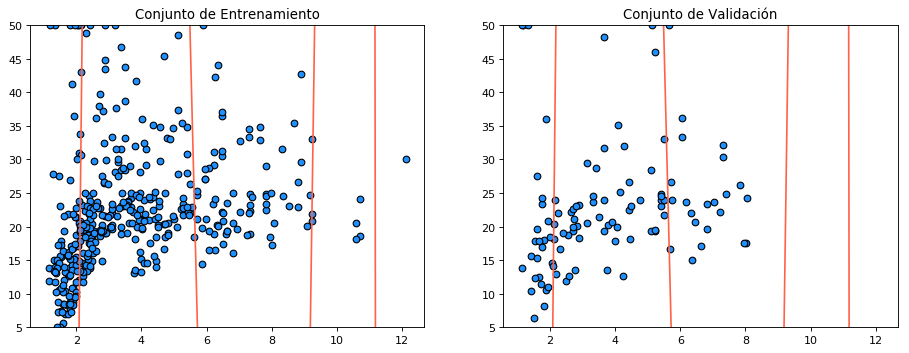

Grado del polinomio:  16  Valor del Alpha:  0.0001
Media del error cuadrado para entrenamiento: 42112.21
Media del error cuadrado para validación: 47121.57


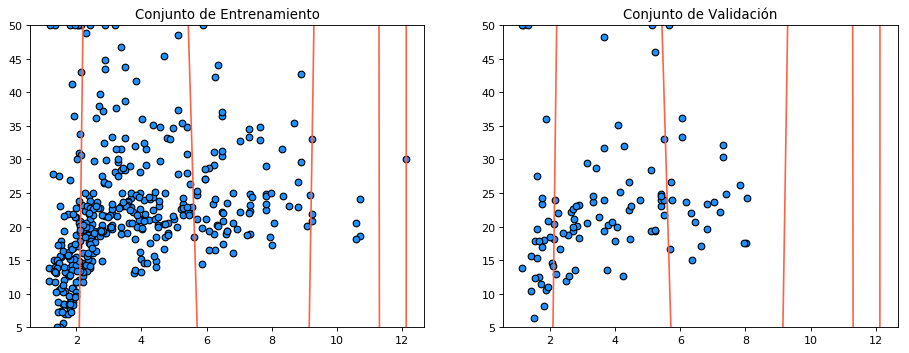

Grado del polinomio:  16  Valor del Alpha:  0.001
Media del error cuadrado para entrenamiento: 6918.96
Media del error cuadrado para validación: 6735.73


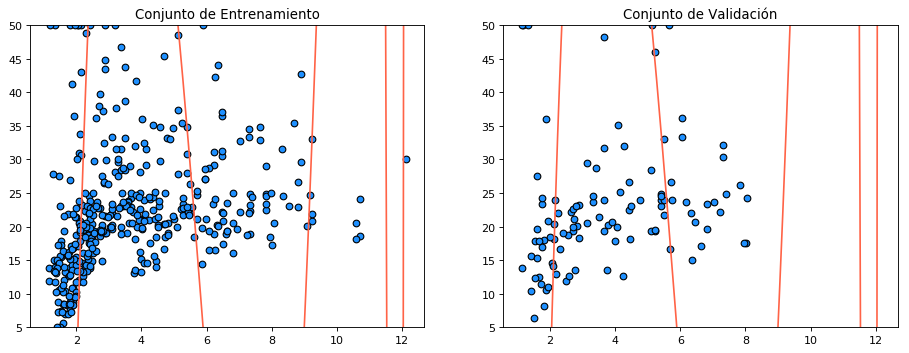

Grado del polinomio:  17  Valor del Alpha:  1e-07
Media del error cuadrado para entrenamiento: 1040377.77
Media del error cuadrado para validación: 4664.58


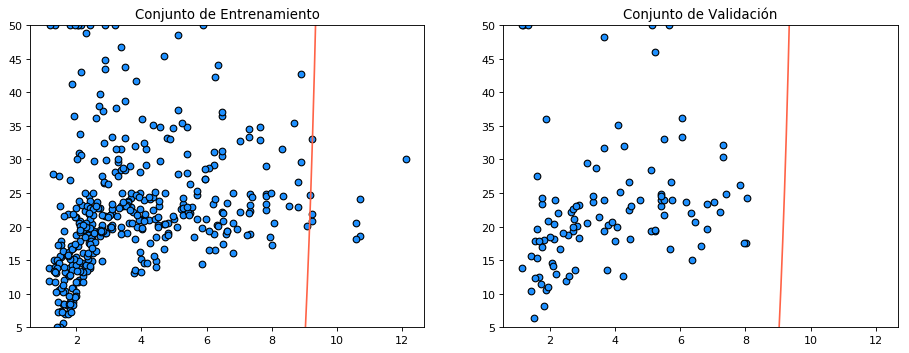

Grado del polinomio:  17  Valor del Alpha:  1e-06
Media del error cuadrado para entrenamiento: 4851137.01
Media del error cuadrado para validación: 35727.88


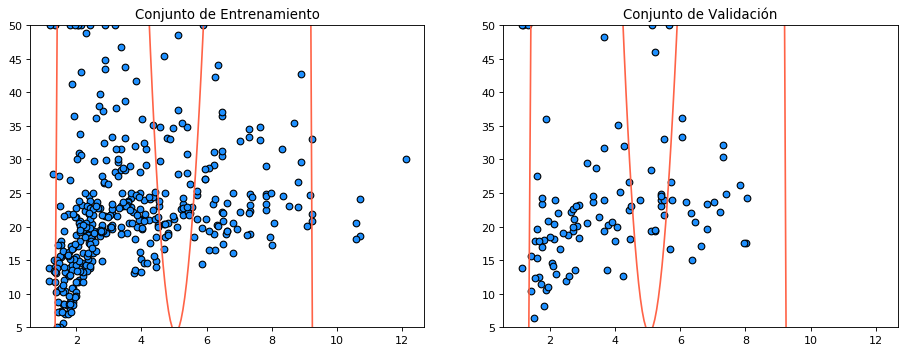

Grado del polinomio:  17  Valor del Alpha:  1e-05
Media del error cuadrado para entrenamiento: 4529160.69
Media del error cuadrado para validación: 32195.45


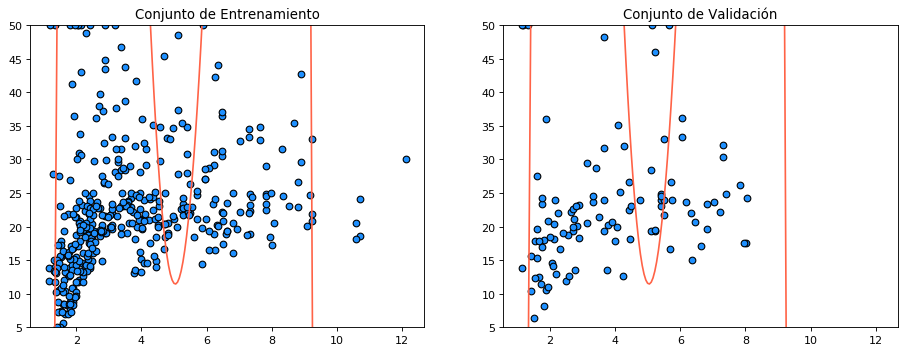

Grado del polinomio:  17  Valor del Alpha:  0.0001
Media del error cuadrado para entrenamiento: 977438.76
Media del error cuadrado para validación: 7354.66


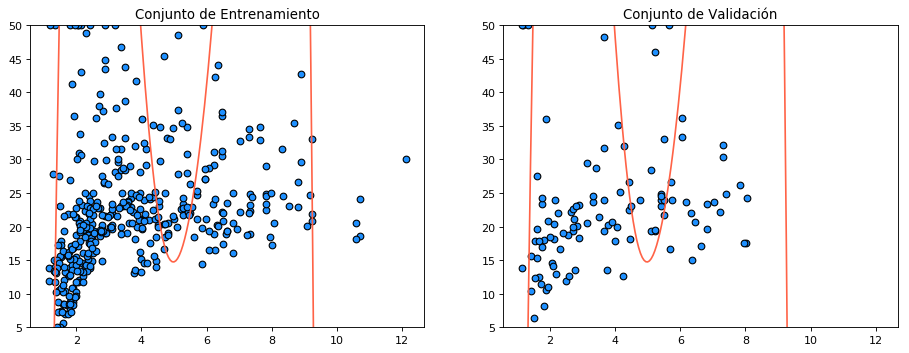

Grado del polinomio:  17  Valor del Alpha:  0.001
Media del error cuadrado para entrenamiento: 78957.12
Media del error cuadrado para validación: 828.62


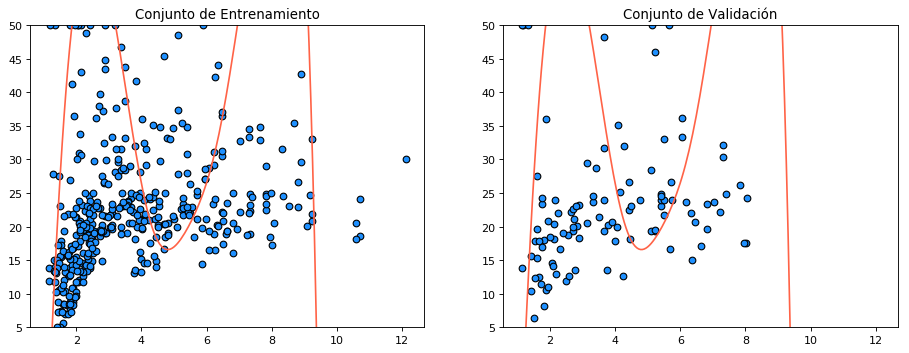

Grado del polinomio:  18  Valor del Alpha:  1e-07
Media del error cuadrado para entrenamiento: 154615.87
Media del error cuadrado para validación: 6741.17


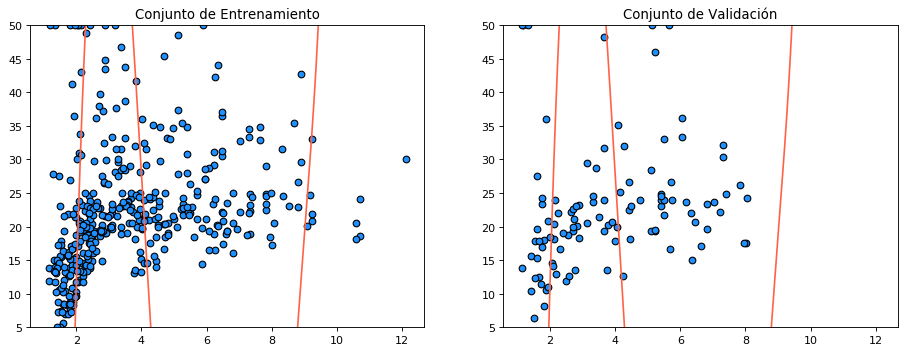

Grado del polinomio:  18  Valor del Alpha:  1e-06
Media del error cuadrado para entrenamiento: 266901.43
Media del error cuadrado para validación: 22303.62


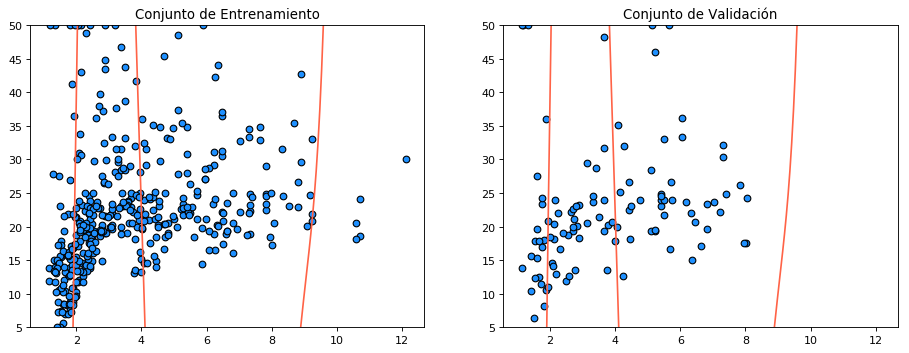

Grado del polinomio:  18  Valor del Alpha:  1e-05
Media del error cuadrado para entrenamiento: 233939.00
Media del error cuadrado para validación: 17312.81


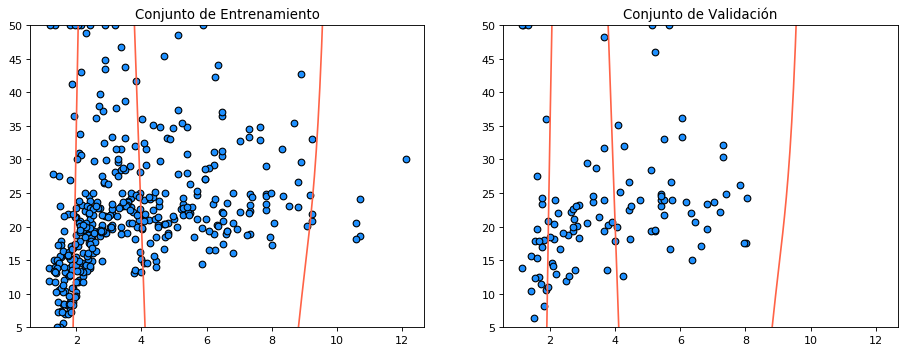

Grado del polinomio:  18  Valor del Alpha:  0.0001
Media del error cuadrado para entrenamiento: 176951.53
Media del error cuadrado para validación: 13123.69


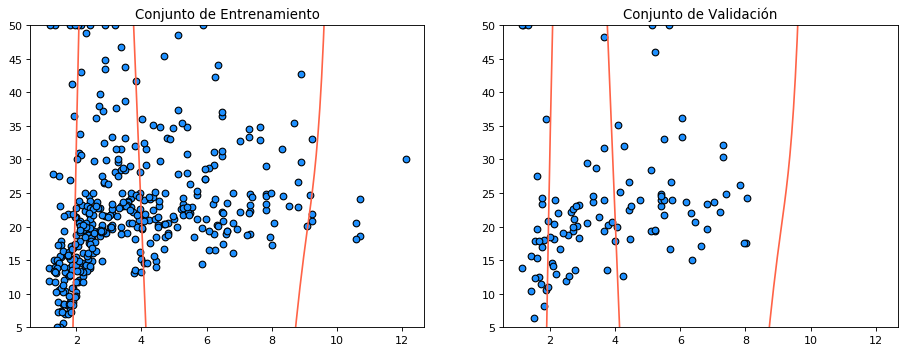

Grado del polinomio:  18  Valor del Alpha:  0.001
Media del error cuadrado para entrenamiento: 39435.67
Media del error cuadrado para validación: 4578.27


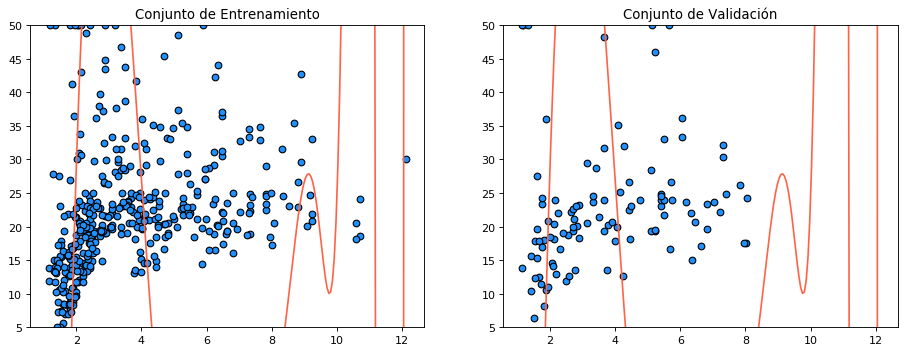

Grado del polinomio:  19  Valor del Alpha:  1e-07
Media del error cuadrado para entrenamiento: 6781896659.52
Media del error cuadrado para validación: 28791146.26


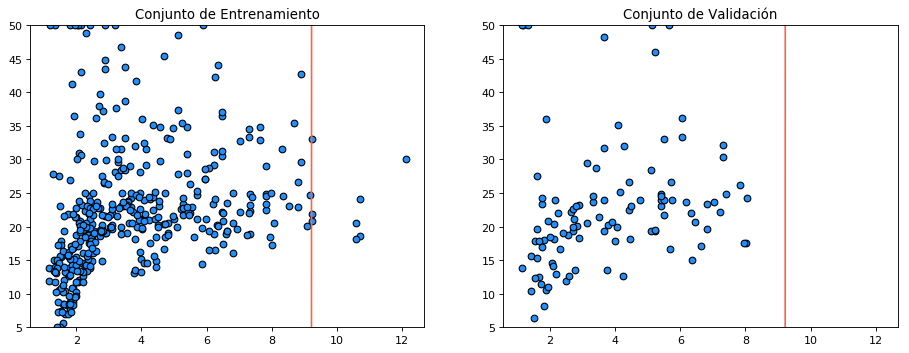

Grado del polinomio:  19  Valor del Alpha:  1e-06
Media del error cuadrado para entrenamiento: 937829521.73
Media del error cuadrado para validación: 3984602.98


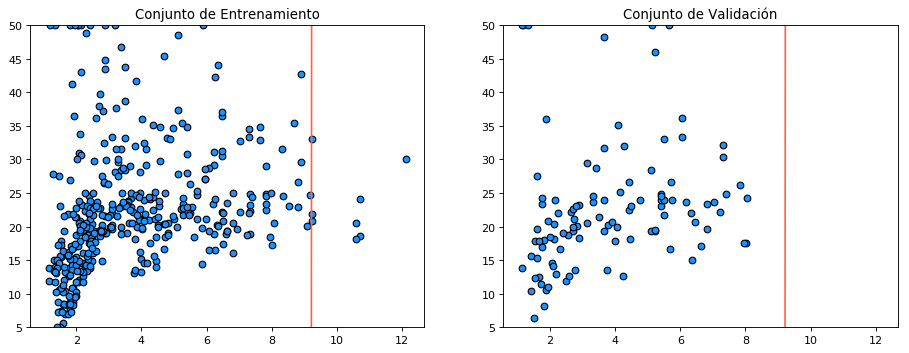

Grado del polinomio:  19  Valor del Alpha:  1e-05
Media del error cuadrado para entrenamiento: 8578292.06
Media del error cuadrado para validación: 44416.15


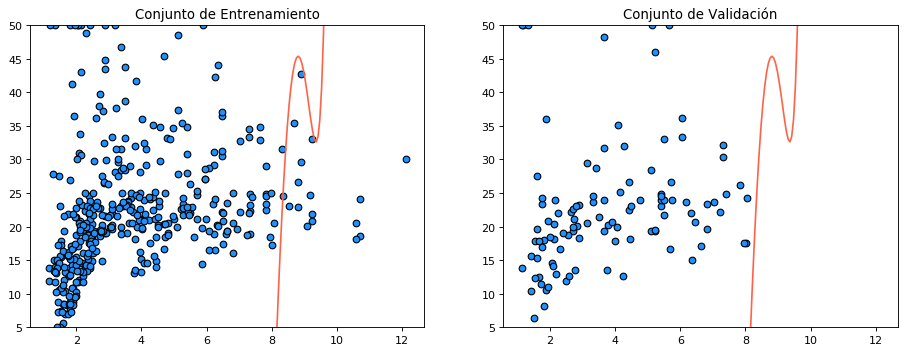

Grado del polinomio:  19  Valor del Alpha:  0.0001
Media del error cuadrado para entrenamiento: 534337.55
Media del error cuadrado para validación: 8270.12


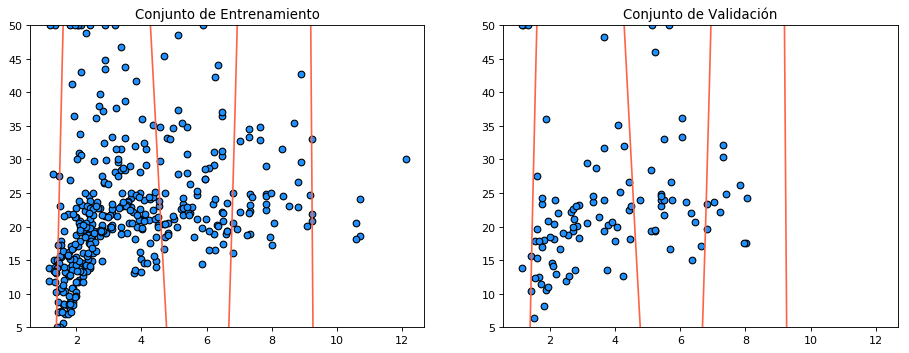

Grado del polinomio:  19  Valor del Alpha:  0.001
Media del error cuadrado para entrenamiento: 117829.82
Media del error cuadrado para validación: 2934.73


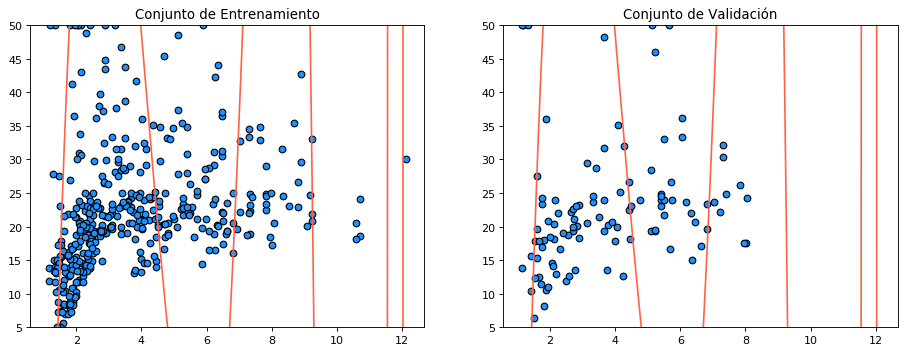

In [70]:

for polynomial_degree in range(8,20):
    for alpha in [10**c for c in np.arange(-7,-2, dtype=float)]:

        print("Grado del polinomio: ",polynomial_degree," Valor del Alpha: ",alpha)
        poly_features = PolynomialFeatures(polynomial_degree)
        poly_features.fit(X_train_feature)
        X_poly_train = poly_features.transform(X_train_feature)
        X_poly_val = poly_features.transform(X_val_feature)

        model = Ridge(alpha=alpha)
        model.fit(X_poly_train, y_train)

        print('Media del error cuadrado para entrenamiento: %.2f' % 
              mean_squared_error(y_train, model.predict(X_poly_train)))
        print('Media del error cuadrado para validación: %.2f' %
              mean_squared_error(y_val, model.predict(X_poly_val)))
        plt.figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')
        
        mce_valid_reg_pol.loc[alpha,polynomial_degree]=mean_squared_error(y_val, model.predict(X_poly_val))
        mce_train_reg_pol.loc[alpha,polynomial_degree]=mean_squared_error(y_train, model.predict(X_poly_train))

        
        X_range_start = np.min(np.r_[X_train_feature, X_val_feature])
        X_range_stop = np.max(np.r_[X_train_feature, X_val_feature])
        y_range_start = np.min(np.r_[y_train, y_val])
        y_range_stop = np.max(np.r_[y_train, y_val])
        X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)
        X_linspace_poly = poly_features.transform(X_linspace)

        # Conjunto de entrenamiento
        plt.subplot(1, 2, 1)
        plt.scatter(X_train_feature, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
        plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
        plt.ylim(y_range_start, y_range_stop)
        plt.title("Conjunto de Entrenamiento")

        # Conjunto de validación
        plt.subplot(1, 2, 2)
        plt.scatter(X_val_feature, y_val, facecolor="dodgerblue", edgecolor="k", label="datos")
        plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
        plt.ylim(y_range_start, y_range_stop)
        plt.title("Conjunto de Validación")

        plt.show()

In [13]:
mce_train_reg_pol == min(mce_train_reg_pol.min())


8      9      10     11     12     13     14     15     16  \
1.000000e-15  False  False  False  False  False  False  False  False  False   
1.000000e-14  False  False  False  False  False  False  False  False  False   
1.000000e-13  False  False  False  False  False  False  False  False  False   
1.000000e-12  False  False  False  False  False  False  False  False  False   
1.000000e-11  False  False  False  False  False  False  False  False  False   
1.000000e-10  False  False  False  False  False  False  False  False  False   
1.000000e-09  False  False  False  False  False  False  False  False  False   
1.000000e-08  False  False  False  False  False  False  False  False  False   
1.000000e-07  False  False  False  False   True  False  False  False  False   
1.000000e-06  False  False  False  False  False  False  False  False  False   
1.000000e-05  False  False  False  False  False  False  False  False  False   
1.000000e-04  False  False  False  False  False  False  False  False  False   
1.000000e-03  False  False  False  False  False  False  False  False  False   

                 17     18     19  
1.000000e-15  False  False  False  
1.000000e-14  False  False  False  
1.000000e-13  False  False  False  
1.000000e-12  False  False  False  
1.000000e-11  False  False  False  
1.000000e-10  False  False  False  
1.000000e-09  False  False  False  
1.000000e-08  False  False  False  
1.000000e-07  False  False  False  
1.000000e-06  False  False  False  
1.000000e-05  False  False  False  
1.000000e-04  False  False  False  
1.000000e-03  False  False  False

In [14]:
mce_valid_reg_pol == min(mce_valid_reg_pol.min())


8      9      10     11     12     13     14     15     16  \
1.000000e-15  False  False  False  False  False  False  False  False  False   
1.000000e-14  False  False  False  False  False  False  False  False  False   
1.000000e-13  False  False  False  False  False  False  False  False  False   
1.000000e-12  False  False  False  False  False  False  False  False  False   
1.000000e-11  False  False  False  False  False  False  False  False  False   
1.000000e-10  False  False  False  False  False  False  False  False  False   
1.000000e-09  False  False  False  False  False  False  False  False  False   
1.000000e-08  False  False  False  False  False  False  False  False  False   
1.000000e-07  False  False  False  False   True  False  False  False  False   
1.000000e-06  False  False  False  False  False  False  False  False  False   
1.000000e-05  False  False  False  False  False  False  False  False  False   
1.000000e-04  False  False  False  False  False  False  False  False  False   
1.000000e-03  False  False  False  False  False  False  False  False  False   

                 17     18     19  
1.000000e-15  False  False  False  
1.000000e-14  False  False  False  
1.000000e-13  False  False  False  
1.000000e-12  False  False  False  
1.000000e-11  False  False  False  
1.000000e-10  False  False  False  
1.000000e-09  False  False  False  
1.000000e-08  False  False  False  
1.000000e-07  False  False  False  
1.000000e-06  False  False  False  
1.000000e-05  False  False  False  
1.000000e-04  False  False  False  
1.000000e-03  False  False  False

In [ ]:
## Otra forma de ver cuál elegir

##### Visualización de la regresión polinomial

## Clasificación binaria

La clasificación binaria tiene dos posibles etiquetas para su clasificación: SI y NO (o 0 y 1, o -1 y 1). Nuevamente, se busca entrenar utilizando el conjunto de entrenamiento (el terminado en `train`) y evaluar utilizando el conjunto de validación (el terminado en `val`). Luego se visualiza la función calculada para cada conjunto y se la compara.

Similar al caso anterior, para poder visualizar los distintos atributos y cómo estos afectan el modelo, debemos hacer uso de una selección de atributos a mano. En este caso todos los atributos son válidos, puesto que todos son numéricos. Como tenemos una clasificación, lo que buscamos ver es la frontera de decisión eligiendo distintos atributos y parámetros para distintos clasificadores. En este caso elegimos 2 atributos ya que la clase se representará por color dentro del gráfico.

### Carga de datos

In [38]:
breast_cancer_data = load_breast_cancer()

# Utilizamos aproximadamente 80% de los datos para entrenamiento y 20% para validación
shuff_data = np.random.permutation(569)
shuff_train = shuff_data[:400]
shuff_val = shuff_data[400:]

X_train = breast_cancer_data['data'][shuff_train]
X_val = breast_cancer_data['data'][shuff_val]

y_train = breast_cancer_data['target'][shuff_train]
y_val = breast_cancer_data['target'][shuff_val]

feature_map = {feature: idx for idx, feature in enumerate(breast_cancer_data['feature_names'])}

print(breast_cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [39]:
print("Listado de atributos\n====================")
for feature in breast_cancer_data['feature_names']:
    print("- %s" % feature)

Listado de atributos
- mean radius
- mean texture
- mean perimeter
- mean area
- mean smoothness
- mean compactness
- mean concavity
- mean concave points
- mean symmetry
- mean fractal dimension
- radius error
- texture error
- perimeter error
- area error
- smoothness error
- compactness error
- concavity error
- concave points error
- symmetry error
- fractal dimension error
- worst radius
- worst texture
- worst perimeter
- worst area
- worst smoothness
- worst compactness
- worst concavity
- worst concave points
- worst symmetry
- worst fractal dimension


In [40]:
d=pd.DataFrame(breast_cancer_data['data'],columns=breast_cancer_data['feature_names']).describe()
d

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension           ...             \
count     569.000000              569.000000           ...              
mean        0.181162                0.062798           ...              
std         0.027414                0.007060           ...              
min         0.106000                0.049960           ...              
25%         0.161900                0.057700           ...              
50%         0.179200                0.061540           ...              
75%         0.195700                0.066120           ...              
max         0.304000                0.097440           ...              

       worst radius  worst texture  worst perimeter   worst area  \
count    569.000000     569.000000       569.000000   569.000000   
mean      16.269190      25.677223       107.261213   880.583128   
std        4.833242       6.146258        33.602542   569.356993   
min        7.930000      12.020000        50.410000   185.200000   
25%       13.010000      21.080000        84.110000   515.300000   
50%       14.970000      25.410000        97.660000   686.500000   
75%       18.790000      29.720000       125.400000  1084.000000   
max       36.040000      49.540000       251.200000  4254.000000   

       worst smoothness  worst compactness  worst concavity  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       worst concave points  worst symmetry  worst fractal dimension  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 30 columns]

In [41]:
## Calculamos el coeficiente de variación para ver que tan homogénos/heterogéneos son los datos, y ver con
## cuál nos quedamos para realizar la clasificación (quiero el más heterogéneo)

cv=d.loc["std",]/d.loc["mean",]
cv.sort_values(ascending=False)

area error                 1.127771
concavity error            0.946458
mean concavity             0.897753
mean concave points        0.793204
worst concavity            0.766470
perimeter error            0.705448
compactness error          0.702884
fractal dimension error    0.697270
radius error               0.684432
worst area                 0.646568
worst compactness          0.618789
worst concave points       0.573549
mean area                  0.537364
concave points error       0.523077
mean compactness           0.506155
texture error              0.453340
smoothness error           0.426435
symmetry error             0.402407
worst perimeter            0.313278
worst radius               0.297079
mean perimeter             0.264208
mean radius                0.249450
worst texture              0.239366
mean texture               0.222971
worst fractal dimension    0.215154
worst symmetry             0.213281
worst smoothness           0.172491
mean symmetry              0

In [42]:
# Seleccionamos dos atributo de los listados en el apartado anterior, uno para el eje x y otro para el eje y
# TODO: cambiar con estos features
x_feature = 'area error'
y_feature = 'mean concavity'

x_feature_col = feature_map[x_feature]
y_feature_col = feature_map[y_feature]
X_train_feature = X_train[:, [x_feature_col, y_feature_col]]
X_val_feature = X_val[:, [x_feature_col, y_feature_col]]

### Perceptrón

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

In [43]:
#for y in np.arange(0.0, 1.0, 0.01):
 #   for alpha in [10**c for c in np.arange(-5,5, dtype=float)]:
  #  
   #     penalty = "l2"# TODO: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados), elasticnet (l1 + l2).
        #alpha =0.00000000001 # TODO: Parámetro de regularización. También denominado como parámetro `lambda`.
    #    max_iter =10000 # TODO: Cantidad máxima de iteraciones del algoritmo

     #   model = Perceptron(penalty=penalty, alpha=alpha, max_iter=max_iter,class_weight={0:y, 1:1-y})
      #  model.fit(X_train_feature, y_train)
    


In [44]:
## Lo hacemos para el tipo de regularización tipo 'l2'
penalty = "l2"# TODO: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados), elasticnet (l1 + l2).
        #alpha =0.00000000001 # TODO: Parámetro de regularización. También denominado como parámetro `lambda`.
max_iter =10000 # TODO: Cantidad máxima de iteraciones del algoritmo


alfa = []
promedio = []


for alpha in [10**c for c in np.arange(-5,5, dtype=float)]:
    
    
    model = Perceptron(penalty=penalty, alpha=alpha, max_iter=max_iter)
    model.fit(X_train_feature, y_train)

        # Evaluamos el desempeño del clasificador utilizando la exactitud (accuracy) sobre el conjunto
        # de datos de entrenamiento (X_train, y_train) y lo comparamos con el de validación (X_val, y_val)
        # La exactitud toma valor en el rango [0, 1] donde más alto es mejor

    
    print('El término de regularización es: ', alpha)
    print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train_feature)))
    print('Exactitud para validación: %.2f' % accuracy_score(y_val, model.predict(X_val_feature)))

    promedio.append((accuracy_score(y_train, model.predict(X_train_feature)) + accuracy_score(y_val, model.predict(X_val_feature)))/2)
    alfa.append(alpha)
        
#         plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

#         plt.subplot(2, 2, 1)
#         plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
#                               classes=breast_cancer_data.target_names,
#                               title='Matriz de confusión para entrenamiento (sin normalizar)')
#         plt.subplot(2, 2, 3)
#         plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
#                               classes=breast_cancer_data.target_names, normalize=True,
#                               title='Matriz de confusión para entrenamiento (normalizando)')

#         plt.subplot(2, 2, 2)
#         plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
#                               classes=breast_cancer_data.target_names,
#                               title='Matriz de confusión para validación (sin normalizar)')
#         plt.subplot(2, 2, 4)
#         plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
#                               classes=breast_cancer_data.target_names, normalize=True,
#                               title='Matriz de confusión para validación (normalizando)')

#         plt.show()
        
#         plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

#         xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

#         cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
#         cmap_back = ListedColormap(['lightcoral', 'skyblue'])

#         # Conjunto de entrenamiento
#         plt.subplot(1, 2, 1)
#         plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
#         plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
#         plt.xlim(xx.min(), xx.max())
#         plt.ylim(yy.min(), yy.max())
#         plt.title("Conjunto de Entrenamiento")

#         # Conjunto de validación
#         plt.subplot(1, 2, 2)
#         plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
#         plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
#         plt.xlim(xx.min(), xx.max())
#         plt.ylim(yy.min(), yy.max())
#         plt.title("Conjunto de Validación")

#         plt.show()


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


El término de regularización es:  1e-05
Exactitud para entrenamiento: 0.82
Exactitud para validación: 0.79


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


El término de regularización es:  0.0001
Exactitud para entrenamiento: 0.81
Exactitud para validación: 0.78


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


El término de regularización es:  0.001
Exactitud para entrenamiento: 0.80
Exactitud para validación: 0.78


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


El término de regularización es:  0.01
Exactitud para entrenamiento: 0.88
Exactitud para validación: 0.85


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


El término de regularización es:  0.1
Exactitud para entrenamiento: 0.85
Exactitud para validación: 0.82


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


El término de regularización es:  1.0
Exactitud para entrenamiento: 0.62
Exactitud para validación: 0.64


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


El término de regularización es:  10.0
Exactitud para entrenamiento: 0.62
Exactitud para validación: 0.64


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


El término de regularización es:  100.0
Exactitud para entrenamiento: 0.62
Exactitud para validación: 0.64


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


El término de regularización es:  1000.0
Exactitud para entrenamiento: 0.62
Exactitud para validación: 0.64


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


El término de regularización es:  10000.0
Exactitud para entrenamiento: 0.62
Exactitud para validación: 0.64


In [45]:
f = {'Alpha': alfa, 'Promedio exactitud' : promedio}
df = pd.DataFrame(data=f)

maximo = df['Promedio exactitud'].argmax()
df[maximo:maximo+1]


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  after removing the cwd from sys.path.


Alpha  Promedio exactitud
3   0.01            0.863536

C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


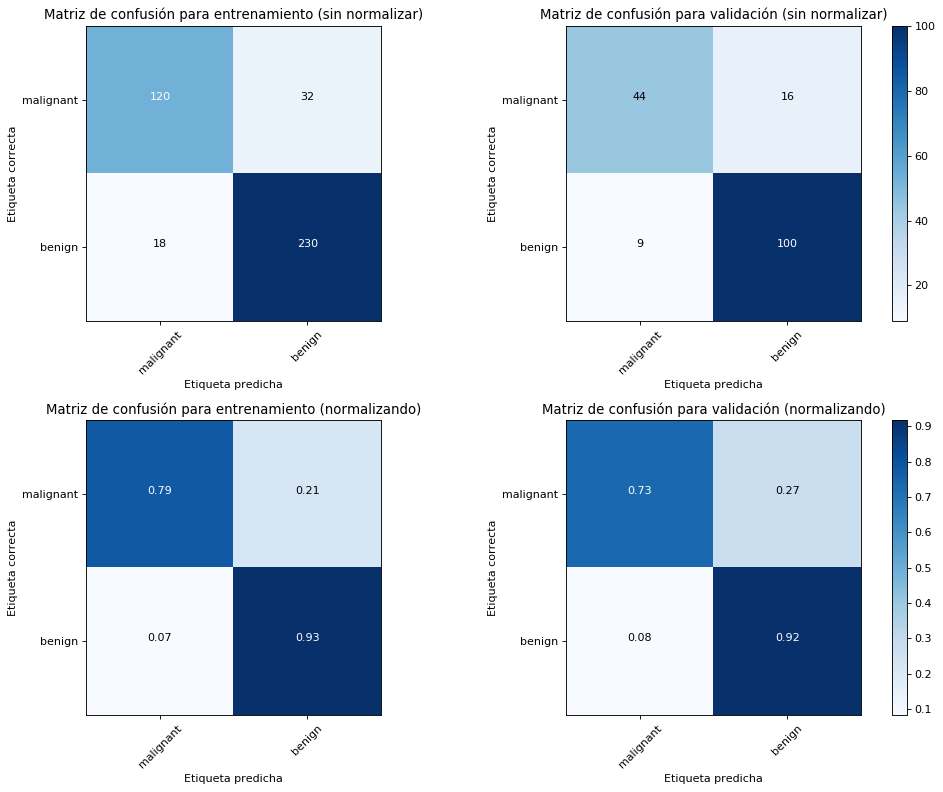

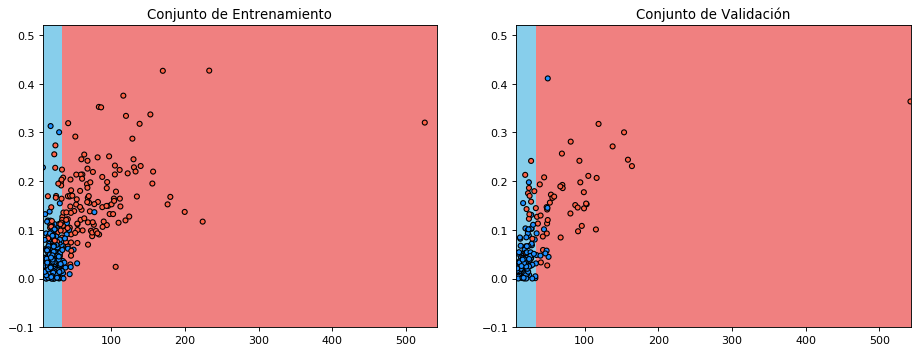

In [46]:
model = Perceptron(penalty=penalty, alpha=0.01, max_iter=max_iter)
model.fit(X_train_feature, y_train)

plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=breast_cancer_data.target_names,
                      title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=breast_cancer_data.target_names, normalize=True,
                      title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=breast_cancer_data.target_names,
                      title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=breast_cancer_data.target_names, normalize=True,
                      title='Matriz de confusión para validación (normalizando)')

plt.show()


plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
cmap_back = ListedColormap(['lightcoral', 'skyblue'])

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Validación")

plt.show()

In [47]:
## Lo hacemos para el tipo de regularización tipo 'l1'
alfa = []
promedio = []

for alpha in [10**c for c in np.arange(-4,2, dtype=float)]:

    penalty = "l1"# TODO: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados), elasticnet (l1 + l2).
    #alpha =0.00000000001 # TODO: Parámetro de regularización. También denominado como parámetro `lambda`.
    max_iter =10000 # TODO: Cantidad máxima de iteraciones del algoritmo

    model = Perceptron(penalty=penalty, alpha=alpha, max_iter=max_iter)
    model.fit(X_train_feature, y_train)

    # Evaluamos el desempeño del clasificador utilizando la exactitud (accuracy) sobre el conjunto
    # de datos de entrenamiento (X_train, y_train) y lo comparamos con el de validación (X_val, y_val)
    # La exactitud toma valor en el rango [0, 1] donde más alto es mejor


    print('El término de regularización es: ', alpha)
    print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train_feature)))
    print('Exactitud para validación: %.2f' % accuracy_score(y_val, model.predict(X_val_feature)))

    promedio.append((accuracy_score(y_train, model.predict(X_train_feature)) + accuracy_score(y_val, model.predict(X_val_feature)))/2)
    alfa.append(alpha)
#         plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

#         plt.subplot(2, 2, 1)
#         plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
#                               classes=breast_cancer_data.target_names,
#                               title='Matriz de confusión para entrenamiento (sin normalizar)')
#         plt.subplot(2, 2, 3)
#         plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
#                               classes=breast_cancer_data.target_names, normalize=True,
#                               title='Matriz de confusión para entrenamiento (normalizando)')

#         plt.subplot(2, 2, 2)
#         plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
#                               classes=breast_cancer_data.target_names,
#                               title='Matriz de confusión para validación (sin normalizar)')
#         plt.subplot(2, 2, 4)
#         plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
#                               classes=breast_cancer_data.target_names, normalize=True,
#                               title='Matriz de confusión para validación (normalizando)')

#         plt.show()
        
#         plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

#         xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

#         cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
#         cmap_back = ListedColormap(['lightcoral', 'skyblue'])

#         # Conjunto de entrenamiento
#         plt.subplot(1, 2, 1)
#         plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
#         plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
#         plt.xlim(xx.min(), xx.max())
#         plt.ylim(yy.min(), yy.max())
#         plt.title("Conjunto de Entrenamiento")

#         # Conjunto de validación
#         plt.subplot(1, 2, 2)
#         plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
#         plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
#         plt.xlim(xx.min(), xx.max())
#         plt.ylim(yy.min(), yy.max())
#         plt.title("Conjunto de Validación")

#         plt.show()


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


El término de regularización es:  0.0001
Exactitud para entrenamiento: 0.86
Exactitud para validación: 0.83


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


El término de regularización es:  0.001
Exactitud para entrenamiento: 0.84
Exactitud para validación: 0.80


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


El término de regularización es:  0.01
Exactitud para entrenamiento: 0.80
Exactitud para validación: 0.75


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


El término de regularización es:  0.1
Exactitud para entrenamiento: 0.83
Exactitud para validación: 0.78


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


El término de regularización es:  1.0
Exactitud para entrenamiento: 0.65
Exactitud para validación: 0.68


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


El término de regularización es:  10.0
Exactitud para entrenamiento: 0.59
Exactitud para validación: 0.60


In [48]:
f = {'Alpha': alfa, 'Promedio exactitud' : promedio}
df = pd.DataFrame(data=f)

maximo = df['Promedio exactitud'].argmax()
df[maximo:maximo+1]


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  after removing the cwd from sys.path.


Alpha  Promedio exactitud
0  0.0001             0.84966

C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


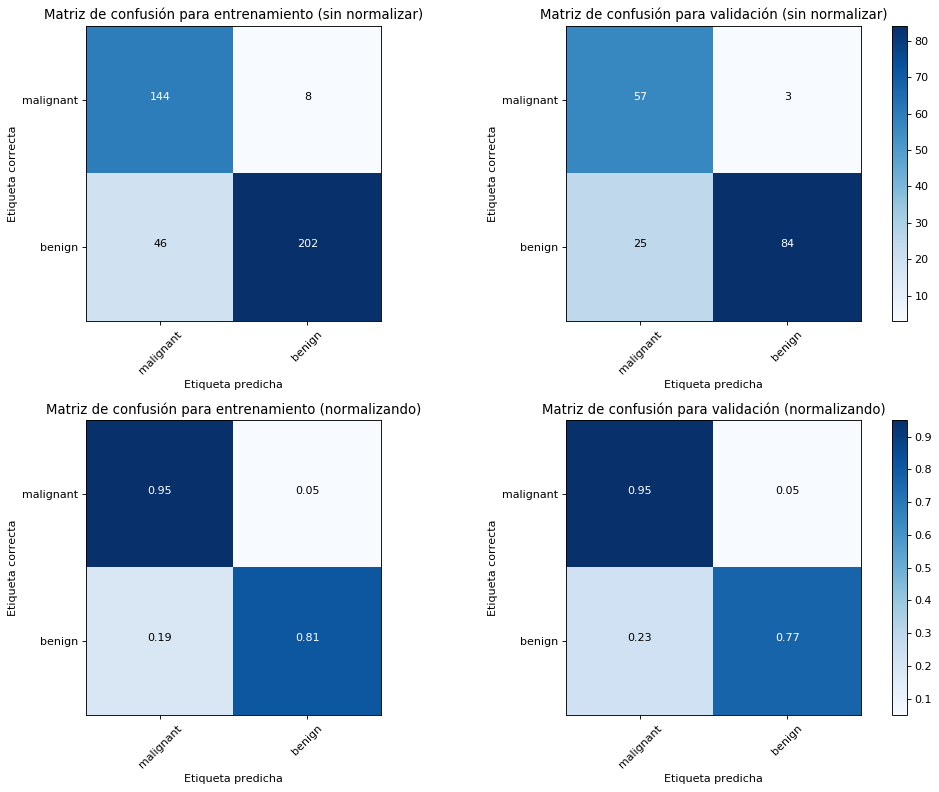

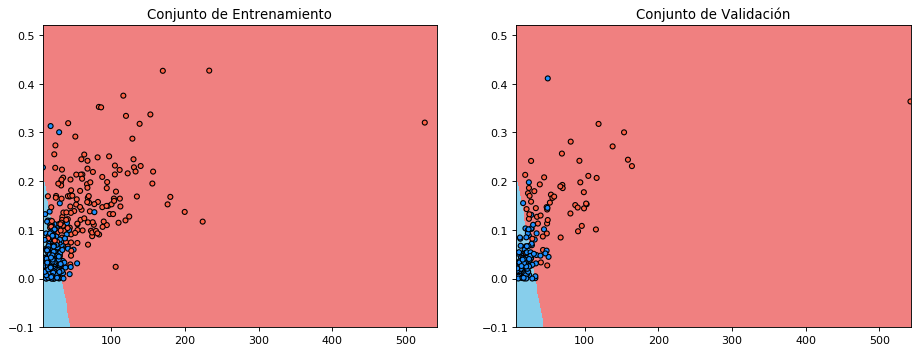

In [49]:
model = Perceptron(penalty=penalty, alpha=0.0001, max_iter=max_iter)
model.fit(X_train_feature, y_train)

plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=breast_cancer_data.target_names,
                      title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=breast_cancer_data.target_names, normalize=True,
                      title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=breast_cancer_data.target_names,
                      title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=breast_cancer_data.target_names, normalize=True,
                      title='Matriz de confusión para validación (normalizando)')

plt.show()


plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
cmap_back = ListedColormap(['lightcoral', 'skyblue'])

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Validación")

plt.show()

#### Matriz de confusión

La matriz de confusión sirve en clasificación para ver que tanto se desviaron las instancias (de entrenamiento o de validación) de su valor real.

In [25]:
## VER ARRIBA YA ESTÁ HECHO


# plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

# plt.subplot(2, 2, 1)
# plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
#                       classes=breast_cancer_data.target_names,
#                       title='Matriz de confusión para entrenamiento (sin normalizar)')
# plt.subplot(2, 2, 3)
# plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
#                       classes=breast_cancer_data.target_names, normalize=True,
#                       title='Matriz de confusión para entrenamiento (normalizando)')

# plt.subplot(2, 2, 2)
# plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
#                       classes=breast_cancer_data.target_names,
#                       title='Matriz de confusión para validación (sin normalizar)')
# plt.subplot(2, 2, 4)
# plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
#                       classes=breast_cancer_data.target_names, normalize=True,
#                       title='Matriz de confusión para validación (normalizando)')

# plt.show()

#### Visualización de la frontera de decisión

In [26]:
# VER ARRIBA YA ESTÁ HECHO

# plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

# xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

# cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
# cmap_back = ListedColormap(['lightcoral', 'skyblue'])

# # Conjunto de entrenamiento
# plt.subplot(1, 2, 1)
# plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
# plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.title("Conjunto de Entrenamiento")

# # Conjunto de validación
# plt.subplot(1, 2, 2)
# plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
# plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.title("Conjunto de Validación")

# plt.show()

### Regresión logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [50]:
penalty = "l1" # TODO: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados).
#alpha =  # TODO: Parámetro de regularización. También denominado como parámetro `lambda`. Debe ser mayor que 0.

alfa = []
promedio = []

for alpha in [10**c for c in np.arange(-6,4, dtype=float)]:
    model = LogisticRegression(penalty=penalty, C=1./alpha)
    model.fit(X_train_feature, y_train)
    
    print('Término de regularización: ',alpha)
    print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train_feature)))
    print('Exactitud para validación: %.2f' % accuracy_score(y_val, model.predict(X_val_feature)))
    print('======================================')
    
    promedio.append((accuracy_score(y_train, model.predict(X_train_feature)) + accuracy_score(y_val, model.predict(X_val_feature)))/2)
    alfa.append(alpha)
#     plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

#     plt.subplot(2, 2, 1)
#     plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
#                           classes=breast_cancer_data.target_names,
#                           title='Matriz de confusión para entrenamiento (sin normalizar)')
#     plt.subplot(2, 2, 3)
#     plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
#                           classes=breast_cancer_data.target_names, normalize=True,
#                           title='Matriz de confusión para entrenamiento (normalizando)')

#     plt.subplot(2, 2, 2)
#     plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
#                           classes=breast_cancer_data.target_names,
#                           title='Matriz de confusión para validación (sin normalizar)')
#     plt.subplot(2, 2, 4)
#     plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
#                           classes=breast_cancer_data.target_names, normalize=True,
#                           title='Matriz de confusión para validación (normalizando)')

#     plt.show()

#     plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

#     xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

#     cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
#     cmap_back = ListedColormap(['lightcoral', 'skyblue'])

#     # Conjunto de entrenamiento
#     plt.subplot(1, 2, 1)
#     plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
#     plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.title("Conjunto de Entrenamiento")

#     # Conjunto de validación
#     plt.subplot(1, 2, 2)
#     plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
#     plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.title("Conjunto de Validación")

#     plt.show()

C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: Futur

Término de regularización:  1e-06
Exactitud para entrenamiento: 0.92
Exactitud para validación: 0.89
Término de regularización:  1e-05
Exactitud para entrenamiento: 0.92
Exactitud para validación: 0.89
Término de regularización:  0.0001
Exactitud para entrenamiento: 0.92
Exactitud para validación: 0.89
Término de regularización:  0.001
Exactitud para entrenamiento: 0.92
Exactitud para validación: 0.89
Término de regularización:  0.01
Exactitud para entrenamiento: 0.92
Exactitud para validación: 0.89
Término de regularización:  0.1
Exactitud para entrenamiento: 0.92
Exactitud para validación: 0.89
Término de regularización:  1.0
Exactitud para entrenamiento: 0.92
Exactitud para validación: 0.88
Término de regularización:  10.0
Exactitud para entrenamiento: 0.88
Exactitud para validación: 0.85
Término de regularización:  100.0
Exactitud para entrenamiento: 0.38
Exactitud para validación: 0.36
Término de regularización:  1000.0
Exactitud para entrenamiento: 0.38
Exactitud para validación:

C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: Futur

In [51]:
f = {'Alpha': alfa, 'Promedio exactitud' : promedio}
df = pd.DataFrame(data=f)
maximo = df['Promedio exactitud'].argmax()
df[maximo:maximo+1]

C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  This is separate from the ipykernel package so we can avoid doing imports until


Alpha  Promedio exactitud
5    0.1            0.905496

C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


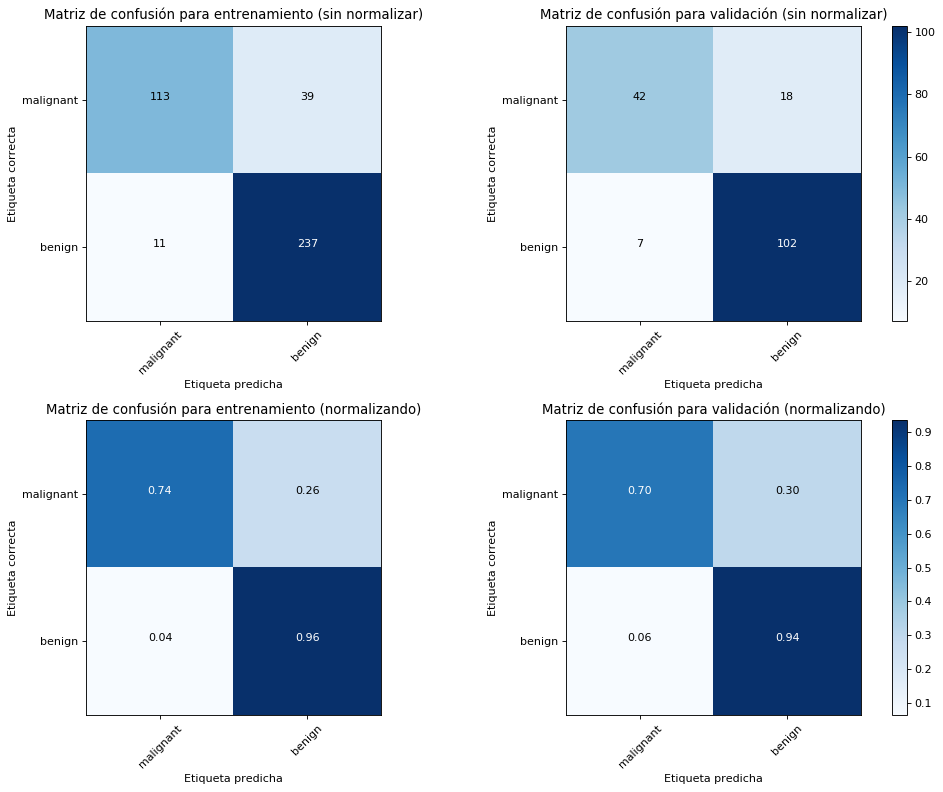

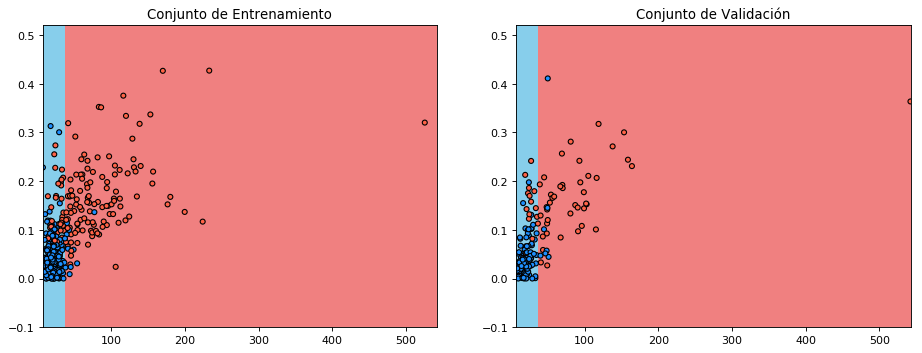

In [53]:
model = LogisticRegression(penalty=penalty, C=0.1)
model.fit(X_train_feature, y_train)

plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=breast_cancer_data.target_names,
                      title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=breast_cancer_data.target_names, normalize=True,
                      title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=breast_cancer_data.target_names,
                      title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=breast_cancer_data.target_names, normalize=True,
                      title='Matriz de confusión para validación (normalizando)')

plt.show()

plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
cmap_back = ListedColormap(['lightcoral', 'skyblue'])

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Validación")

plt.show()

In [54]:
penalty1 = "l2" # TODO: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados).
#alpha =  # TODO: Parámetro de regularización. También denominado como parámetro `lambda`. Debe ser mayor que 0.

alfa = []
promedio = []

for alpha in [10**c for c in np.arange(-4,2, dtype=float)]:
    model = LogisticRegression(penalty=penalty, C=1./alpha)
    model.fit(X_train_feature, y_train)
    
    print('Término de regularización: ',alpha)
    print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train_feature)))
    print('Exactitud para validación: %.2f' % accuracy_score(y_val, model.predict(X_val_feature)))
    print('======================================')
    
    promedio.append((accuracy_score(y_train, model.predict(X_train_feature)) + accuracy_score(y_val, model.predict(X_val_feature)))/2)
    alfa.append(alpha)
#     plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

#     plt.subplot(2, 2, 1)
#     plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
#                           classes=breast_cancer_data.target_names,
#                           title='Matriz de confusión para entrenamiento (sin normalizar)')
#     plt.subplot(2, 2, 3)
#     plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
#                           classes=breast_cancer_data.target_names, normalize=True,
#                           title='Matriz de confusión para entrenamiento (normalizando)')

#     plt.subplot(2, 2, 2)
#     plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
#                           classes=breast_cancer_data.target_names,
#                           title='Matriz de confusión para validación (sin normalizar)')
#     plt.subplot(2, 2, 4)
#     plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
#                           classes=breast_cancer_data.target_names, normalize=True,
#                           title='Matriz de confusión para validación (normalizando)')

#     plt.show()

#     plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

#     xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

#     cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
#     cmap_back = ListedColormap(['lightcoral', 'skyblue'])

#     # Conjunto de entrenamiento
#     plt.subplot(1, 2, 1)
#     plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
#     plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.title("Conjunto de Entrenamiento")

#     # Conjunto de validación
#     plt.subplot(1, 2, 2)
#     plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
#     plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.title("Conjunto de Validación")

#     plt.show()

Término de regularización:  0.0001
Exactitud para entrenamiento: 0.92
Exactitud para validación: 0.89
Término de regularización:  0.001
Exactitud para entrenamiento: 0.92
Exactitud para validación: 0.89
Término de regularización:  0.01
Exactitud para entrenamiento: 0.92
Exactitud para validación: 0.89
Término de regularización:  0.1
Exactitud para entrenamiento: 0.92
Exactitud para validación: 0.89
Término de regularización:  1.0
Exactitud para entrenamiento: 0.92
Exactitud para validación: 0.88
Término de regularización:  10.0
Exactitud para entrenamiento: 0.88
Exactitud para validación: 0.85


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: Futur

In [55]:
f = {'Alpha': alfa, 'Promedio exactitud' : promedio}
df = pd.DataFrame(data=f)
maximo = df['Promedio exactitud'].argmax()
df[maximo:maximo+1]

C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  This is separate from the ipykernel package so we can avoid doing imports until


Alpha  Promedio exactitud
3    0.1            0.905496

C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


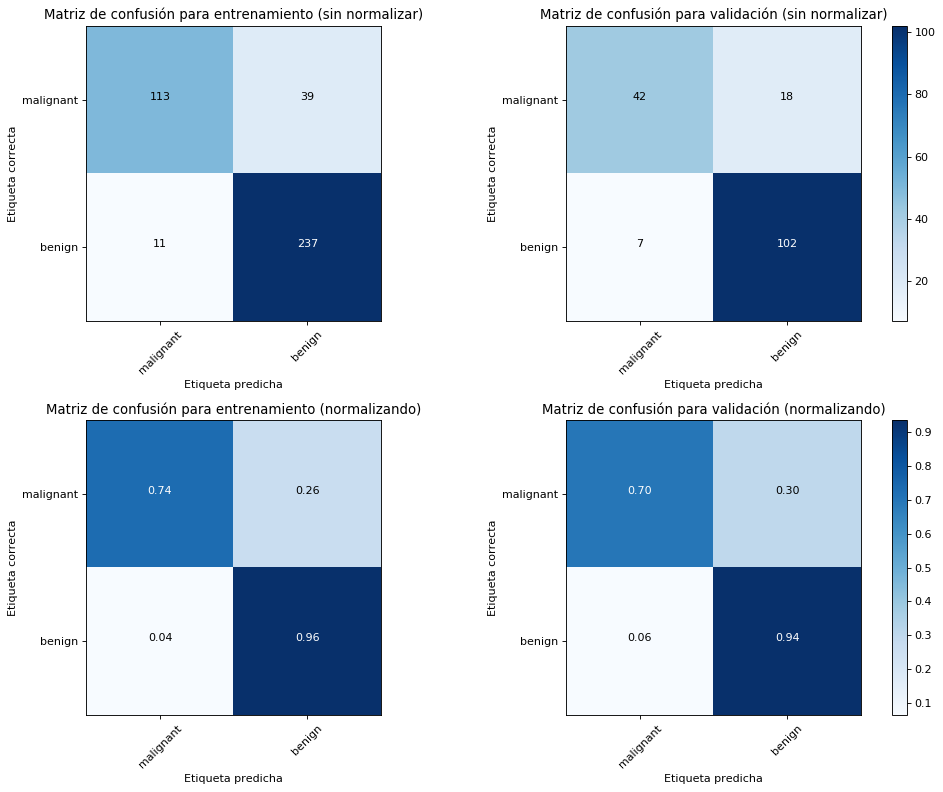

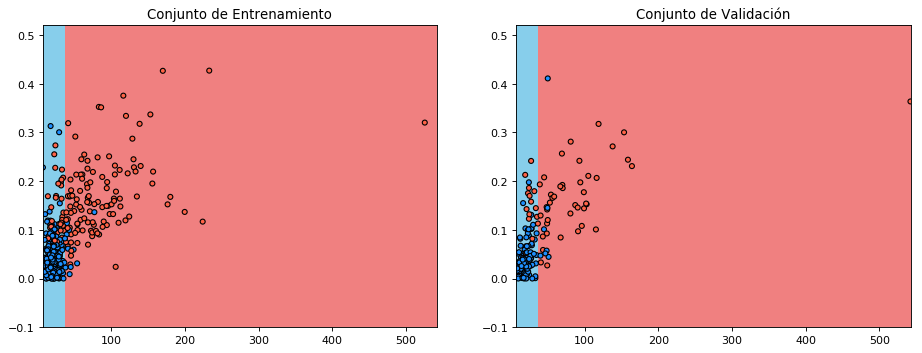

In [56]:
model = LogisticRegression(penalty=penalty, C=0.1)
model.fit(X_train_feature, y_train)

plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=breast_cancer_data.target_names,
                      title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=breast_cancer_data.target_names, normalize=True,
                      title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=breast_cancer_data.target_names,
                      title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=breast_cancer_data.target_names, normalize=True,
                      title='Matriz de confusión para validación (normalizando)')

plt.show()

plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
cmap_back = ListedColormap(['lightcoral', 'skyblue'])

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Validación")

plt.show()

#### Matriz de confusión

In [27]:
# plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

# plt.subplot(2, 2, 1)
# plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
#                       classes=breast_cancer_data.target_names,
#                       title='Matriz de confusión para entrenamiento (sin normalizar)')
# plt.subplot(2, 2, 3)
# plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
#                       classes=breast_cancer_data.target_names, normalize=True,
#                       title='Matriz de confusión para entrenamiento (normalizando)')

# plt.subplot(2, 2, 2)
# plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
#                       classes=breast_cancer_data.target_names,
#                       title='Matriz de confusión para validación (sin normalizar)')
# plt.subplot(2, 2, 4)
# plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
#                       classes=breast_cancer_data.target_names, normalize=True,
#                       title='Matriz de confusión para validación (normalizando)')

# plt.show()

#### Visualización de la frontera de decisión

In [28]:
# plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

# xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

# cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
# cmap_back = ListedColormap(['lightcoral', 'skyblue'])

# # Conjunto de entrenamiento
# plt.subplot(1, 2, 1)
# plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
# plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.title("Conjunto de Entrenamiento")

# # Conjunto de validación
# plt.subplot(1, 2, 2)
# plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
# plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.title("Conjunto de Validación")

# plt.show()

### Vecinos más cercanos

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [111]:
#n_neighbors = 10 # TODO: Cantidad de vecinos a tener en cuenta
#metric = 'euclidean' # TODO: Medida de distancia. Algunas opciones: cosine, euclidean, manhattan.

metrica = []
n_vecinos = []
promedio = []

lista = ["euclidean", "cosine", "manhattan"]

for n_neighbors in range(2,20, 2):
    for metric in lista:

        model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, weights= 'distance')
        model.fit(X_train_feature, y_train)
        print('La medida de distancia es: ', metric)
        print('El número de vecinos es: ', n_neighbors)
        print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train_feature)))
        print('Exactitud para validación: %.2f' % accuracy_score(y_val, model.predict(X_val_feature)))
        print('======================================')
        
        promedio.append((accuracy_score(y_train, model.predict(X_train_feature)) + accuracy_score(y_val, model.predict(X_val_feature)))/2)
        metrica.append(metric)
        n_vecinos.append(n_neighbors)
        
#         plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

#         plt.subplot(2, 2, 1)
#         plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
#                               classes=breast_cancer_data.target_names,
#                               title='Matriz de confusión para entrenamiento (sin normalizar)')
#         plt.subplot(2, 2, 3)
#         plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
#                               classes=breast_cancer_data.target_names, normalize=True,
#                               title='Matriz de confusión para entrenamiento (normalizando)')

#         plt.subplot(2, 2, 2)
#         plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
#                               classes=breast_cancer_data.target_names,
#                               title='Matriz de confusión para validación (sin normalizar)')
#         plt.subplot(2, 2, 4)
#         plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
#                               classes=breast_cancer_data.target_names, normalize=True,
#                               title='Matriz de confusión para validación (normalizando)')

#         plt.show()

#         plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

#         xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

#         cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
#         cmap_back = ListedColormap(['lightcoral', 'skyblue'])

#         # Conjunto de entrenamiento
#         plt.subplot(1, 2, 1)
#         plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
#         plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
#         plt.xlim(xx.min(), xx.max())
#         plt.ylim(yy.min(), yy.max())
#         plt.title("Conjunto de Entrenamiento")

#         # Conjunto de validación
#         plt.subplot(1, 2, 2)
#         plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
#         plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
#         plt.xlim(xx.min(), xx.max())
#         plt.ylim(yy.min(), yy.max())
#         plt.title("Conjunto de Validación")

#         plt.show()

La medida de distancia es:  euclidean
El número de vecinos es:  2
Exactitud para entrenamiento: 1.00
Exactitud para validación: 0.82
La medida de distancia es:  cosine
El número de vecinos es:  2
Exactitud para entrenamiento: 1.00
Exactitud para validación: 0.59
La medida de distancia es:  manhattan
El número de vecinos es:  2
Exactitud para entrenamiento: 1.00
Exactitud para validación: 0.82
La medida de distancia es:  euclidean
El número de vecinos es:  4
Exactitud para entrenamiento: 1.00
Exactitud para validación: 0.85
La medida de distancia es:  cosine
El número de vecinos es:  4
Exactitud para entrenamiento: 1.00
Exactitud para validación: 0.60
La medida de distancia es:  manhattan
El número de vecinos es:  4
Exactitud para entrenamiento: 1.00
Exactitud para validación: 0.85
La medida de distancia es:  euclidean
El número de vecinos es:  6
Exactitud para entrenamiento: 1.00
Exactitud para validación: 0.83
La medida de distancia es:  cosine
El número de vecinos es:  6
Exactitud pa

In [112]:
f = {'Metrica': metrica, 'N° vecinos': n_vecinos, 'Promedio exactitud' : promedio}
df = pd.DataFrame(data=f)
df
maximo = df['Promedio exactitud'].argmax()
df[maximo:maximo+1]

C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  after removing the cwd from sys.path.


Metrica  N° vecinos  Promedio exactitud
5  manhattan           4            0.926036

#### Matriz de confusión

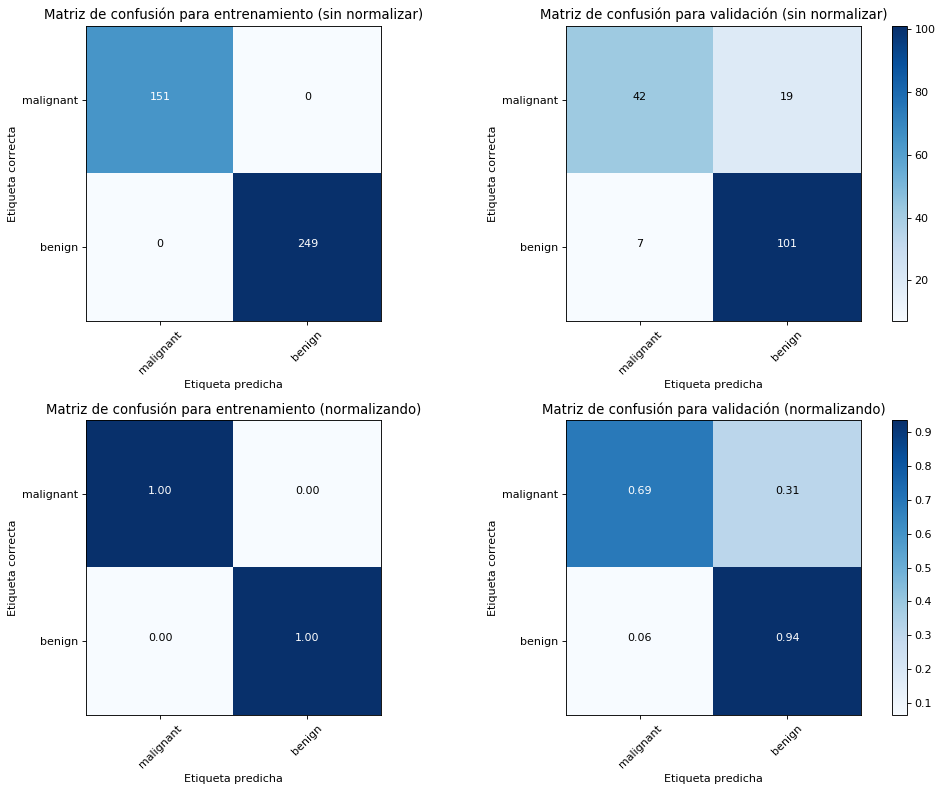

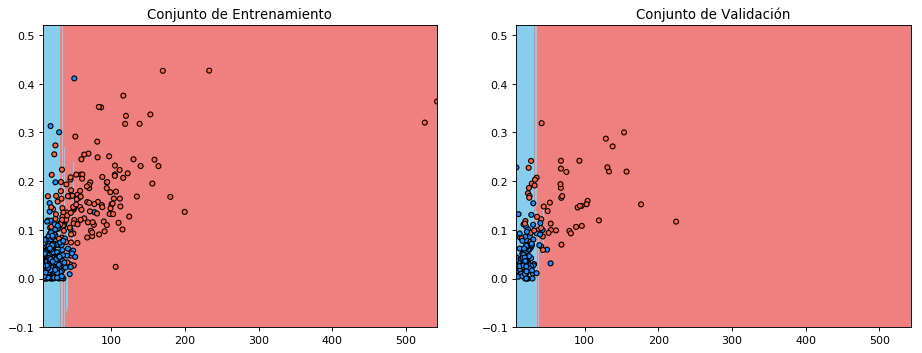

In [113]:
model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, weights= 'distance')
model.fit(X_train_feature, y_train)

plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                              classes=breast_cancer_data.target_names,
                              title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                              classes=breast_cancer_data.target_names, normalize=True,
                              title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                              classes=breast_cancer_data.target_names,
                              title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                          classes=breast_cancer_data.target_names, normalize=True,
                              title='Matriz de confusión para validación (normalizando)')

plt.show()

plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
cmap_back = ListedColormap(['lightcoral', 'skyblue'])

        # Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Entrenamiento")

        # Conjunto de validación
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Validación")

plt.show()

#### Visualización de la frontera de decisión

In [71]:
# plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

# xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

# cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
# cmap_back = ListedColormap(['lightcoral', 'skyblue'])

# # Conjunto de entrenamiento
# plt.subplot(1, 2, 1)
# plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
# plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.title("Conjunto de Entrenamiento")

# # Conjunto de validación
# plt.subplot(1, 2, 2)
# plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
# plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.title("Conjunto de Validación")

# plt.show()

## Clasificación multiclase

Ahora veremos clasificación multiclase. Muy similar al caso anterior, con la diferencia de que en este caso hay más de dos etiquetas posibles para clasificación. Se utilizará el método `one-vs-all` (o también `one-vs-rest`) para hacer posible la clasificaicón.

Una vez más tenemos que decidir dos features para poder visualizar los modelos.

### Carga de datos

In [57]:
iris_data = load_iris()

# Utilizamos aproximadamente 80% de los datos para entrenamiento y 20% para validación
shuff_data = np.random.permutation(150)
shuff_train = shuff_data[:120]
shuff_val = shuff_data[120:]

X_train = iris_data['data'][shuff_train]
X_val = iris_data['data'][shuff_val]

y_train = iris_data['target'][shuff_train]
y_val = iris_data['target'][shuff_val]

feature_map = {feature: idx for idx, feature in enumerate(iris_data['feature_names'])}

print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [58]:
print("Listado de atributos\n====================")
for feature in iris_data['feature_names']:
    print("- %s" % feature)

Listado de atributos
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)


In [59]:
# Seleccionamos dos atributo de los listados en el apartado anterior, uno para el eje x y otro para el eje y
# TODO: Cambiar los atributos y ver como se modifica el resultado
x_feature = 'petal length (cm)'
y_feature = 'petal width (cm)'

x_feature_col = feature_map[x_feature]
y_feature_col = feature_map[y_feature]
X_train_feature = X_train[:, [x_feature_col, y_feature_col]]
X_val_feature = X_val[:, [x_feature_col, y_feature_col]]

### Regresión logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [60]:
penalty = 'l1' # TODO: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados).
#alpha =  # TODO: Parámetro de regularización. También denominado como parámetro `lambda`. Debe ser mayor que 0.

alfa = []
promedio = []

for alpha in [10**c for c in np.arange(-4,1, dtype=float)]:
    
    model = LogisticRegression(penalty=penalty, C=1./alpha, multi_class='ovr')
    model.fit(X_train_feature, y_train)

    print('El término de regularización es: ', alpha)
    print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train_feature)))
    print('Exactitud para validación: %.2f' % accuracy_score(y_val, model.predict(X_val_feature)))
    print('El promedio de exactitud para entrenamiento y validación es de: ', (accuracy_score(y_train, model.predict(X_train_feature)) + accuracy_score(y_val, model.predict(X_val_feature)))/2)

    print('===========================================')
    
    promedio.append((accuracy_score(y_train, model.predict(X_train_feature)) + accuracy_score(y_val, model.predict(X_val_feature)))/2)
    alfa.append(alpha)
    
#     plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

#     plt.subplot(2, 2, 1)
#     plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
#                           classes=iris_data.target_names,
#                           title='Matriz de confusión para entrenamiento (sin normalizar)')
#     plt.subplot(2, 2, 3)
#     plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
#                           classes=iris_data.target_names, normalize=True,
#                           title='Matriz de confusión para entrenamiento (normalizando)')

#     plt.subplot(2, 2, 2)
#     plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
#                           classes=iris_data.target_names,
#                           title='Matriz de confusión para validación (sin normalizar)')
#     plt.subplot(2, 2, 4)
#     plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
#                           classes=iris_data.target_names, normalize=True,
#                           title='Matriz de confusión para validación (normalizando)')

#     plt.show()


#     plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

#     xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

#     cmap_dots = ListedColormap(['tomato', 'dodgerblue', 'goldenrod'])
#     cmap_back = ListedColormap(['lightcoral', 'skyblue', 'palegoldenrod'])

#     # Conjunto de entrenamiento
#     plt.subplot(1, 2, 1)
#     plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
#     plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.title("Conjunto de Entrenamiento")

#     # Conjunto de validación
#     plt.subplot(1, 2, 2)
#     plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
#     plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.title("Conjunto de Validación")

#     plt.show()


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


El término de regularización es:  0.0001
Exactitud para entrenamiento: 0.97
Exactitud para validación: 0.93
El promedio de exactitud para entrenamiento y validación es de:  0.95
El término de regularización es:  0.001
Exactitud para entrenamiento: 0.97
Exactitud para validación: 0.93
El promedio de exactitud para entrenamiento y validación es de:  0.95
El término de regularización es:  0.01
Exactitud para entrenamiento: 0.97
Exactitud para validación: 0.93
El promedio de exactitud para entrenamiento y validación es de:  0.95
El término de regularización es:  0.1
Exactitud para entrenamiento: 0.97
Exactitud para validación: 0.93
El promedio de exactitud para entrenamiento y validación es de:  0.95
El término de regularización es:  1.0
Exactitud para entrenamiento: 0.96
Exactitud para validación: 0.93
El promedio de exactitud para entrenamiento y validación es de:  0.9458333333333333


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWar

In [61]:
f = {'Alpha': alfa, 'Promedio exactitud' : promedio}
df = pd.DataFrame(data=f)
maximo = df['Promedio exactitud'].argmax()
df[maximo:maximo+1]


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  This is separate from the ipykernel package so we can avoid doing imports until


Alpha  Promedio exactitud
0  0.0001                0.95

#### Matriz de confusión

C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


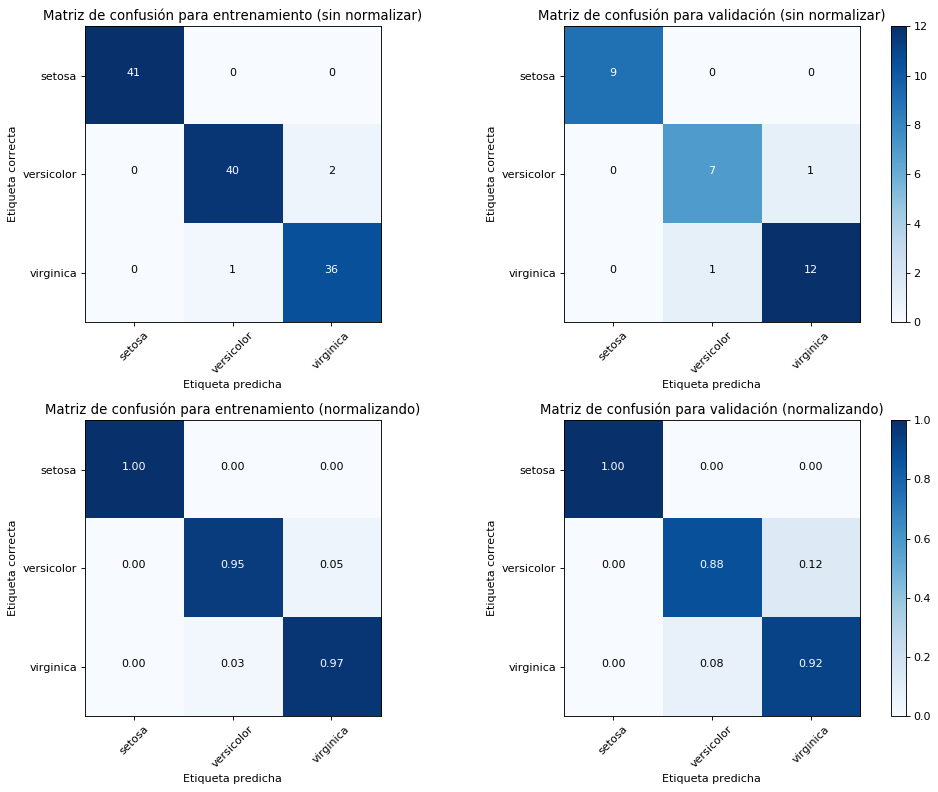

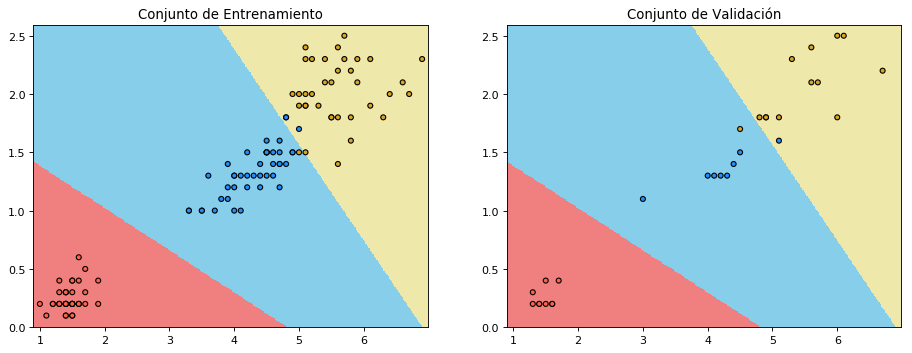

In [62]:
model = LogisticRegression(penalty=penalty, C=1./0.0001, multi_class='ovr')
model.fit(X_train_feature, y_train)

plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=iris_data.target_names,
                      title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=iris_data.target_names, normalize=True,
                      title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=iris_data.target_names,
                      title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=iris_data.target_names, normalize=True,
                      title='Matriz de confusión para validación (normalizando)')

plt.show()

plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

cmap_dots = ListedColormap(['tomato', 'dodgerblue', 'goldenrod'])
cmap_back = ListedColormap(['lightcoral', 'skyblue', 'palegoldenrod'])

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Validación")

plt.show()

#### Visualización de la frontera de decisión

In [ ]:
# plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

# xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

# cmap_dots = ListedColormap(['tomato', 'dodgerblue', 'goldenrod'])
# cmap_back = ListedColormap(['lightcoral', 'skyblue', 'palegoldenrod'])

# # Conjunto de entrenamiento
# plt.subplot(1, 2, 1)
# plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
# plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.title("Conjunto de Entrenamiento")

# # Conjunto de validación
# plt.subplot(1, 2, 2)
# plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
# plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.title("Conjunto de Validación")

# plt.show()

### Vecinos más cercanos

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [46]:
#n_neighbors = # TODO: Cantidad de vecinos a tener en cuenta
#metric =  # TODO: Medida de distancia. Algunas opciones: cosine, euclidean, manhattan.

lista = ["euclidean", "cosine", "manhattan"]

promedio = []
metrica = []
n_vecinos = []

for n_neighbors in range(2,20):
    for metric in lista:


        model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
        model.fit(X_train_feature, y_train)

        print('La medida de distancia es: ', metric)
        print('El número de vecinos es: ', n_neighbors)
        print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train_feature)))
        print('Exactitud para validación: %.2f' % accuracy_score(y_val, model.predict(X_val_feature)))
        print('El promedio de exactitud para entrenamiento y validación es de: ', (accuracy_score(y_train, model.predict(X_train_feature)) + accuracy_score(y_val, model.predict(X_val_feature)))/2)
        print('================================================')
       
        promedio.append((accuracy_score(y_train, model.predict(X_train_feature)) + accuracy_score(y_val, model.predict(X_val_feature)))/2)
        metrica.append(metric)
        n_vecinos.append(n_neighbors)
        
        
        
        
        
#       plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

#         plt.subplot(2, 2, 1)
#         plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
#                               classes=iris_data.target_names,
#                               title='Matriz de confusión para entrenamiento (sin normalizar)')
#         plt.subplot(2, 2, 3)
#         plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
#                               classes=iris_data.target_names, normalize=True,
#                               title='Matriz de confusión para entrenamiento (normalizando)')

#         plt.subplot(2, 2, 2)
#         plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
#                               classes=iris_data.target_names,
#                               title='Matriz de confusión para validación (sin normalizar)')
#         plt.subplot(2, 2, 4)
#         plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
#                               classes=iris_data.target_names, normalize=True,
#                               title='Matriz de confusión para validación (normalizando)')

#         plt.show()

#         plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

#         xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

#         cmap_dots = ListedColormap(['tomato', 'dodgerblue', 'goldenrod'])
#         cmap_back = ListedColormap(['lightcoral', 'skyblue', 'palegoldenrod'])

#         # Conjunto de entrenamiento
#         plt.subplot(1, 2, 1)
#         plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
#         plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
#         plt.xlim(xx.min(), xx.max())
#         plt.ylim(yy.min(), yy.max())
#         plt.title("Conjunto de Entrenamiento")

#         # Conjunto de validación
#         plt.subplot(1, 2, 2)
#         plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
#         plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
#         plt.xlim(xx.min(), xx.max())
#         plt.ylim(yy.min(), yy.max())
#         plt.title("Conjunto de Validación")

#         plt.show()

La medida de distancia es:  euclidean
El número de vecinos es:  2
Exactitud para entrenamiento: 0.97
Exactitud para validación: 0.93
El promedio de exactitud para entrenamiento y validación es de:  0.9541666666666666
La medida de distancia es:  cosine
El número de vecinos es:  2
Exactitud para entrenamiento: 0.86
Exactitud para validación: 0.67
El promedio de exactitud para entrenamiento y validación es de:  0.7625
La medida de distancia es:  manhattan
El número de vecinos es:  2
Exactitud para entrenamiento: 0.97
Exactitud para validación: 0.93
El promedio de exactitud para entrenamiento y validación es de:  0.9541666666666666
La medida de distancia es:  euclidean
El número de vecinos es:  3
Exactitud para entrenamiento: 0.97
Exactitud para validación: 0.90
El promedio de exactitud para entrenamiento y validación es de:  0.9375
La medida de distancia es:  cosine
El número de vecinos es:  3
Exactitud para entrenamiento: 0.87
Exactitud para validación: 0.70
El promedio de exactitud para

Exactitud para validación: 0.83
El promedio de exactitud para entrenamiento y validación es de:  0.8041666666666667
La medida de distancia es:  manhattan
El número de vecinos es:  12
Exactitud para entrenamiento: 0.98
Exactitud para validación: 0.93
El promedio de exactitud para entrenamiento y validación es de:  0.9583333333333333
La medida de distancia es:  euclidean
El número de vecinos es:  13
Exactitud para entrenamiento: 0.98
Exactitud para validación: 0.93
El promedio de exactitud para entrenamiento y validación es de:  0.9583333333333333
La medida de distancia es:  cosine
El número de vecinos es:  13
Exactitud para entrenamiento: 0.78
Exactitud para validación: 0.83
El promedio de exactitud para entrenamiento y validación es de:  0.8041666666666667
La medida de distancia es:  manhattan
El número de vecinos es:  13
Exactitud para entrenamiento: 0.98
Exactitud para validación: 0.93
El promedio de exactitud para entrenamiento y validación es de:  0.9583333333333333
La medida de di

In [56]:

#f = pd.DataFrame(promedio,metrica, n_vecinos).reset_index()
f = {'Metrica': metrica, 'N° vecinos': n_vecinos, 'Promedio exactitud' : promedio}
df = pd.DataFrame(data=f)
df
#f.rename(columns={'index':'Metrica', 0:'N Vecinos', 1: 'Promedio exactitud'}, inplace=True)

Metrica  N° vecinos  Promedio exactitud
0   euclidean           2            0.954167
1      cosine           2            0.762500
2   manhattan           2            0.954167
3   euclidean           3            0.937500
4      cosine           3            0.783333
5   manhattan           3            0.937500
6   euclidean           4            0.954167
7      cosine           4            0.820833
8   manhattan           4            0.954167
9   euclidean           5            0.954167
10     cosine           5            0.779167
11  manhattan           5            0.937500
12  euclidean           6            0.954167
13     cosine           6            0.766667
14  manhattan           6            0.937500
15  euclidean           7            0.954167
16     cosine           7            0.795833
17  manhattan           7            0.937500
18  euclidean           8            0.954167
19     cosine           8            0.812500
20  manhattan           8            0.958333
21  euclidean           9            0.958333
22     cosine           9            0.820833
23  manhattan           9            0.958333
24  euclidean          10            0.954167
25     cosine          10            0.808333
26  manhattan          10            0.958333
27  euclidean          11            0.937500
28     cosine          11            0.808333
29  manhattan          11            0.958333
30  euclidean          12            0.958333
31     cosine          12            0.804167
32  manhattan          12            0.958333
33  euclidean          13            0.958333
34     cosine          13            0.804167
35  manhattan          13            0.958333
36  euclidean          14            0.958333
37     cosine          14            0.804167
38  manhattan          14            0.954167
39  euclidean          15            0.958333
40     cosine          15            0.804167
41  manhattan          15            0.954167
42  euclidean          16            0.958333
43     cosine          16            0.808333
44  manhattan          16            0.954167
45  euclidean          17            0.958333
46     cosine          17            0.804167
47  manhattan          17            0.950000
48  euclidean          18            0.954167
49     cosine          18            0.804167
50  manhattan          18            0.950000
51  euclidean          19            0.954167
52     cosine          19            0.808333
53  manhattan          19            0.950000

In [67]:
maximo = df['Promedio exactitud'].argmax()
df[maximo:maximo+1]


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Metrica  N° vecinos  Promedio exactitud
20  manhattan           8            0.958333

#### Matriz de confusión

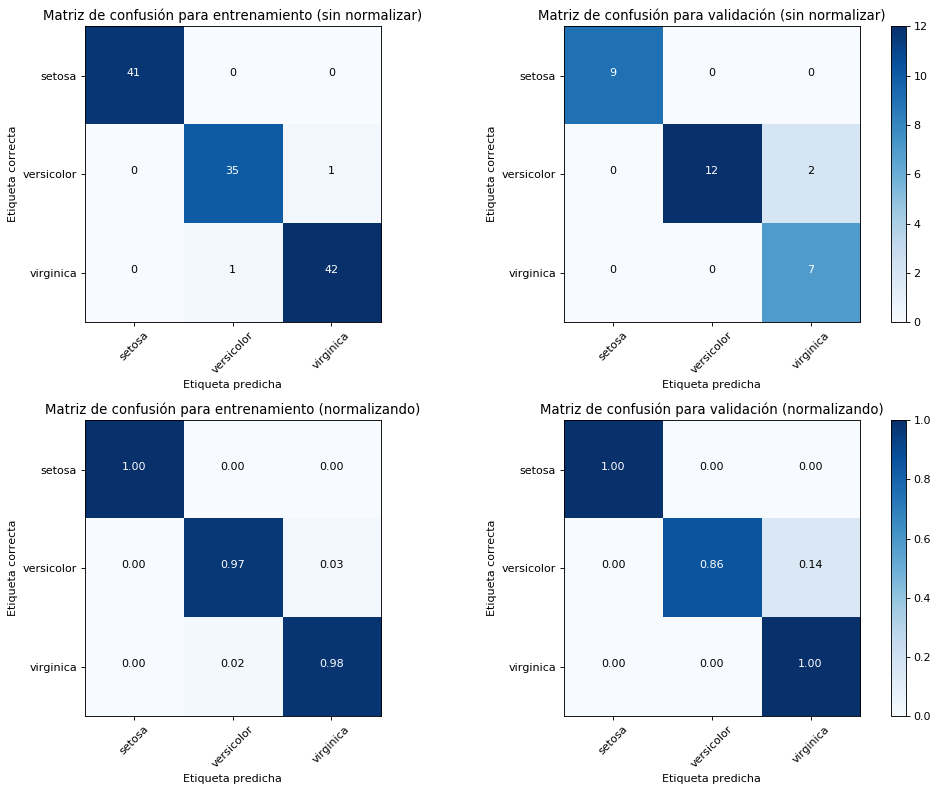

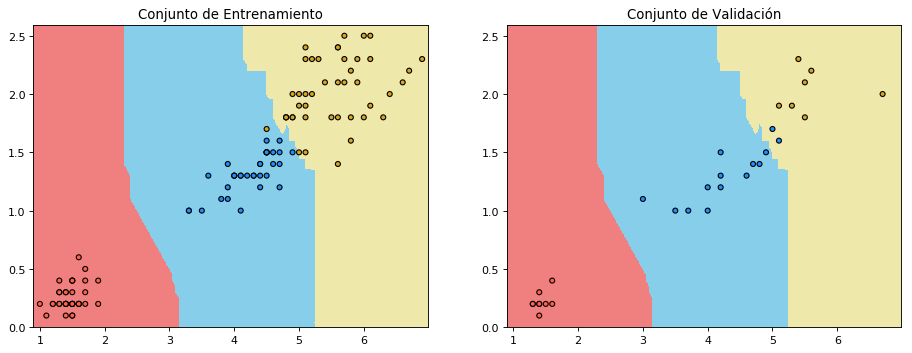

In [71]:
n_neighbors = 8
metric = 'manhattan'

model = KNeighborsClassifier(n_neighbors=8, metric=metric)
model.fit(X_train_feature, y_train)

plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=iris_data.target_names,
                      title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=iris_data.target_names, normalize=True,
                      title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=iris_data.target_names,
                      title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=iris_data.target_names, normalize=True,
                      title='Matriz de confusión para validación (normalizando)')

plt.show()

plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

cmap_dots = ListedColormap(['tomato', 'dodgerblue', 'goldenrod'])
cmap_back = ListedColormap(['lightcoral', 'skyblue', 'palegoldenrod'])

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Validación")

plt.show()


#### Visualización de la frontera de decisión

In [ ]:
# plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

# xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

# cmap_dots = ListedColormap(['tomato', 'dodgerblue', 'goldenrod'])
# cmap_back = ListedColormap(['lightcoral', 'skyblue', 'palegoldenrod'])

# # Conjunto de entrenamiento
# plt.subplot(1, 2, 1)
# plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
# plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.title("Conjunto de Entrenamiento")

# # Conjunto de validación
# plt.subplot(1, 2, 2)
# plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
# plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.title("Conjunto de Validación")

# plt.show()